#**CS530 : MACHINE LEARNING PROJECT**

-------------------------------------------------------


Intelligent Crop Yield Prediction for Precision Farming,"Develop an AI-powered  system that predicts crop yields based on soil quality, weather conditions, and farm location.


Scope: Feature engineering for weather-based factors, data augmentation for missing agricultural records.",


"Decision Trees, Support Vector Regression, KNN"


Crop Recommendation Dataset


- soil quality : (features : Nitrogen(N), Phosphorus(P) and Potassium(K) )
- weather conditions : (features : temperature	humidity	ph )
- farm location :  (features : rainfall )

#**Loading data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
crop= pd.read_csv( "/content/drive/MyDrive/Classroom/CS530 Jan 2025/PROJECT/Crop_recommendation.csv")
crop.head()
# crop

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

#**Exploratory Data Analysis**

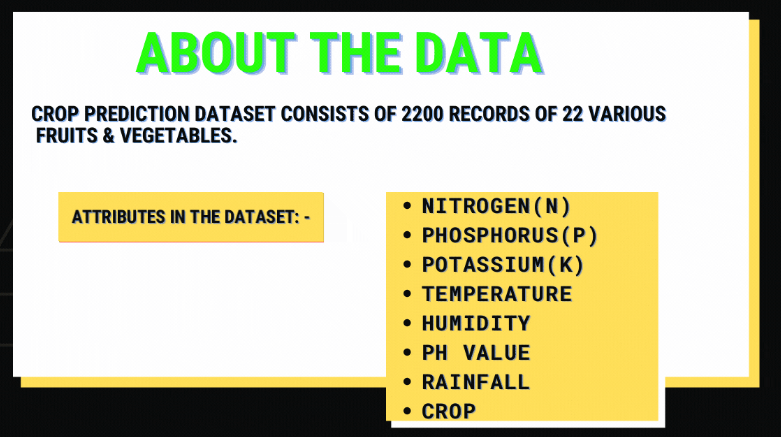

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns #statistical graphics



In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
crop['label'].value_counts() # count labels


label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [ ]:
print(crop.shape)  #(rows X colums)
print(crop.columns)

(2200, 8)
Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [ ]:
crop_summary = pd.pivot_table(crop,index=['label'],aggfunc='mean') #mean for all column
crop_summary

K       N       P   humidity        ph    rainfall  \
label                                                                  
apple        199.89   20.80  134.22  92.333383  5.929663  112.654779   
banana        50.05  100.23   82.01  80.358123  5.983893  104.626980   
blackgram     19.24   40.02   67.47  65.118426  7.133952   67.884151   
chickpea      79.92   40.09   67.79  16.860439  7.336957   80.058977   
coconut       30.59   21.98   16.93  94.844272  5.976562  175.686646   
coffee        29.94  101.20   28.74  58.869846  6.790308  158.066295   
cotton        19.56  117.77   46.24  79.843474  6.912675   80.398043   
grapes       200.11   23.18  132.53  81.875228  6.025937   69.611829   
jute          39.99   78.40   46.86  79.639864  6.732778  174.792798   
kidneybeans   20.05   20.75   67.54  21.605357  5.749411  105.919778   
lentil        19.41   18.77   68.36  64.804785  6.927932   45.680454   
maize         19.79   77.76   48.44  65.092249  6.245190   84.766988   
mango         29.92   20.07   27.18  50.156573  5.766373   94.704515   
mothbeans     20.23   21.44   48.01  53.160418  6.831174   51.198487   
mungbean      19.87   20.99   47.28  85.499975  6.723957   48.403601   
muskmelon     50.08  100.32   17.72  92.342802  6.358805   24.689952   
orange        10.01   19.58   16.55  92.170209  7.016957  110.474969   
papaya        50.04   49.88   59.05  92.403388  6.741442  142.627839   
pigeonpeas    20.29   20.73   67.73  48.061633  5.794175  149.457564   
pomegranate   40.21   18.87   18.75  90.125504  6.429172  107.528442   
rice          39.87   79.89   47.58  82.272822  6.425471  236.181114   
watermelon    50.22   99.42   17.00  85.160375  6.495778   50.786219   

             temperature  
label                     
apple          22.630942  
banana         27.376798  
blackgram      29.973340  
chickpea       18.872847  
coconut        27.409892  
coffee         25.540477  
cotton         23.988958  
grapes         23.849575  
jute           24.958376  
kidneybeans    20.115085  
lentil         24.509052  
maize          22.389204  
mango          31.208770  
mothbeans      28.194920  
mungbean       28.525775  
muskmelon      28.663066  
orange         22.765725  
papaya         33.723859  
pigeonpeas     27.741762  
pomegranate    21.837842  
rice           23.689332  
watermelon     25.591767

In [ ]:
crop.describe()  # count , mean , SD , min, percentiles (25% , 50% , 75%) , max


N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [ ]:
import pandas as pd; from sklearn.preprocessing import LabelEncoder
le = LabelEncoder(); crop['label'] = le.fit_transform(crop['label'])
print(f"Encoded labels: {crop['label'].unique()}\nNames: {list(le.classes_)}")

Encoded labels: [20 11  3  9 18 13 14  2 10 19  1 12  7 21 15  0 16 17  4  6  8  5]
Names: ['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice', 'watermelon']


In [ ]:
### Lets understand which crops can only be Grown in Summer , Winter  and Monsoon

print("Summer Crops:", crop[(crop['temperature'] > 30) & (crop['humidity'] > 50)]['label'].unique())
print("Winter Crops:", crop[(crop['temperature'] < 20) & (crop['humidity'] > 30)]['label'].unique())
print("Rainy Crops:", crop[(crop['rainfall'] > 200) & (crop['humidity'] > 30)]['label'].unique())

Summer Crops: [18 13  2 12  7 16 17]
Winter Crops: [11 18 10 19  7 16]
Rainy Crops: [20 17  4]




**Correlation** shows how strongly two variables move together.

- **Range**: from **-1 to +1**
  - `+1` → Perfect positive correlation (both variables increase together)
  - `0` → No correlation (completely independent)
  - `-1` → Perfect negative correlation (one increases, the other decreases)

---
 Pearson Correlation Coefficient Formula:
r = (sum((x_i - x̄)(y_i - ȳ))) / sqrt(sum((x_i - x̄)²) * sum((y_i - ȳ)²))

Where:
- x_i, y_i = individual data points
- x̄, ȳ = means of x and y


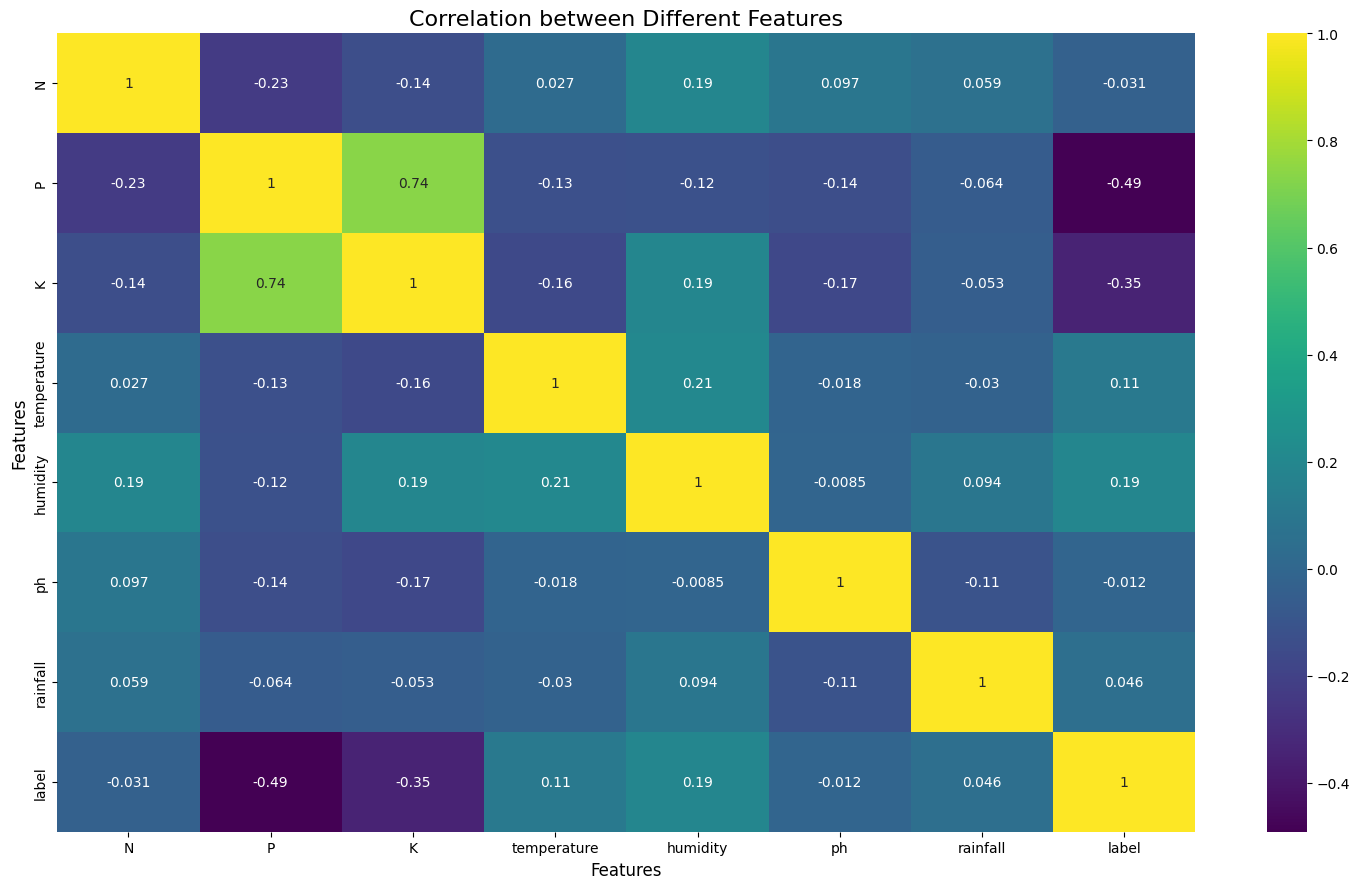

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(crop.corr(), annot=True,cmap='viridis')

# set axis labels and title
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Features', fontsize=12)
ax.set_title('Correlation between Different Features', fontsize=16, color='black')

plt.tight_layout()
plt.show()

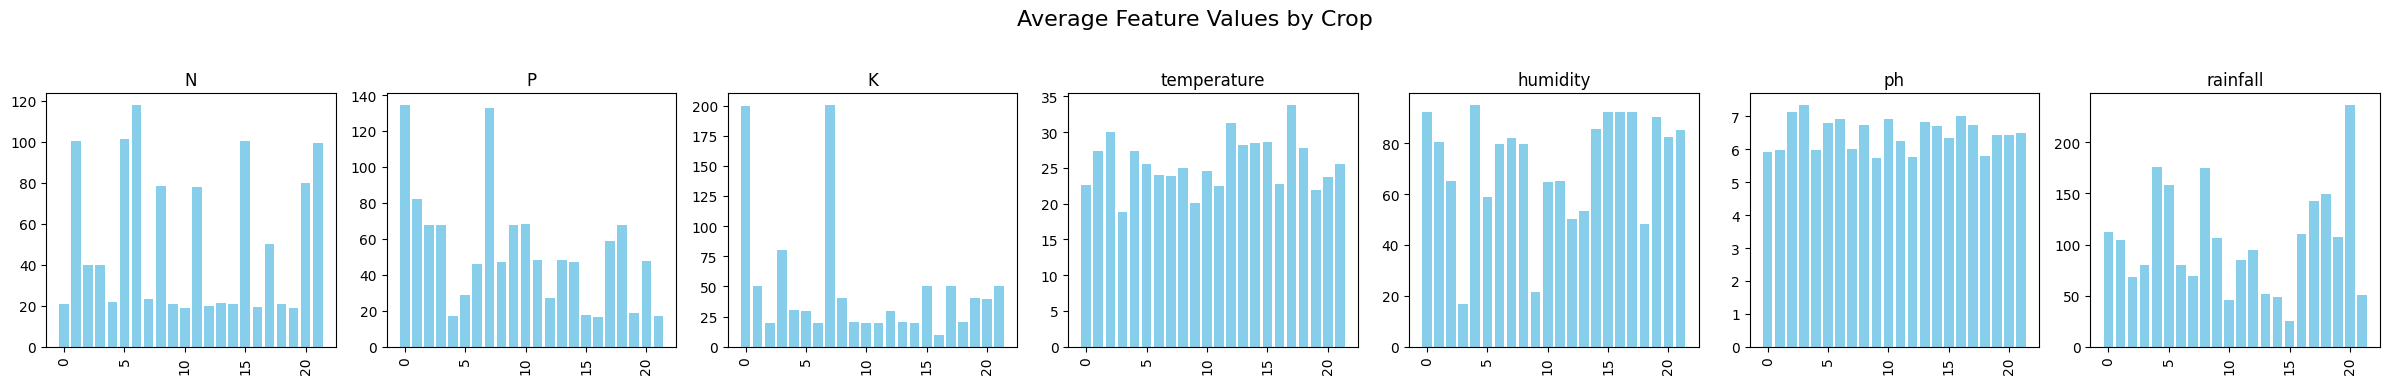

In [ ]:
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
crop_means = crop.groupby('label')[features].mean().reset_index()
fig, axes = plt.subplots(1, 7, figsize=(24, 4), sharex=True)

for i, feature in enumerate(features):
    axes[i].bar(crop_means['label'], crop_means[feature], color='skyblue')
    axes[i].set_title(feature)
    axes[i].tick_params(axis='x', rotation=90)

fig.suptitle('Average Feature Values by Crop', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
crop['label']=LabelEncoder().fit_transform(crop['label'])
crop['label'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

#**Feature Selection**

In [ ]:
features = crop[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = crop['label']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size = 0.3,random_state =2)

In [ ]:
print(pd.DataFrame({'Dataset': ['x_train', 'x_test', 'y_train', 'y_test'], 'Rows': [x_train.shape[0], x_test.shape[0], y_train.shape[0], y_test.shape[0]], 'Columns': [x_train.shape[1], x_test.shape[1], 1, 1]}).to_string(index=False))

Dataset  Rows  Columns
x_train  1540        7
 x_test   660        7
y_train  1540        1
 y_test   660        1


#**Algorithms**

##**K-Nearest Neighbors**

###**Classification**


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Classroom/CS530 Jan 2025/PROJECT/Crop_recommendation.csv")

# encode target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])  # Transform crop names into numbers

df.head()


N   P   K  temperature   humidity        ph    rainfall  label
0  90  42  43    20.879744  82.002744  6.502985  202.935536     20
1  85  58  41    21.770462  80.319644  7.038096  226.655537     20
2  60  55  44    23.004459  82.320763  7.840207  263.964248     20
3  74  35  40    26.491096  80.158363  6.980401  242.864034     20
4  78  42  42    20.130175  81.604873  7.628473  262.717340     20

In [ ]:
# Standardize the Variables
# Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(df.drop('label', axis=1))

scaled_features = scaler.transform(df.drop('label', axis=1))

df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()


N         P         K  temperature  humidity        ph  rainfall
0  1.068797 -0.344551 -0.101688    -0.935587  0.472666  0.043302  1.810361
1  0.933329  0.140616 -0.141185    -0.759646  0.397051  0.734873  2.242058
2  0.255986  0.049647 -0.081939    -0.515898  0.486954  1.771510  2.921066
3  0.635298 -0.556811 -0.160933     0.172807  0.389805  0.660308  2.537048
4  0.743673 -0.344551 -0.121436    -1.083647  0.454792  1.497868  2.898373

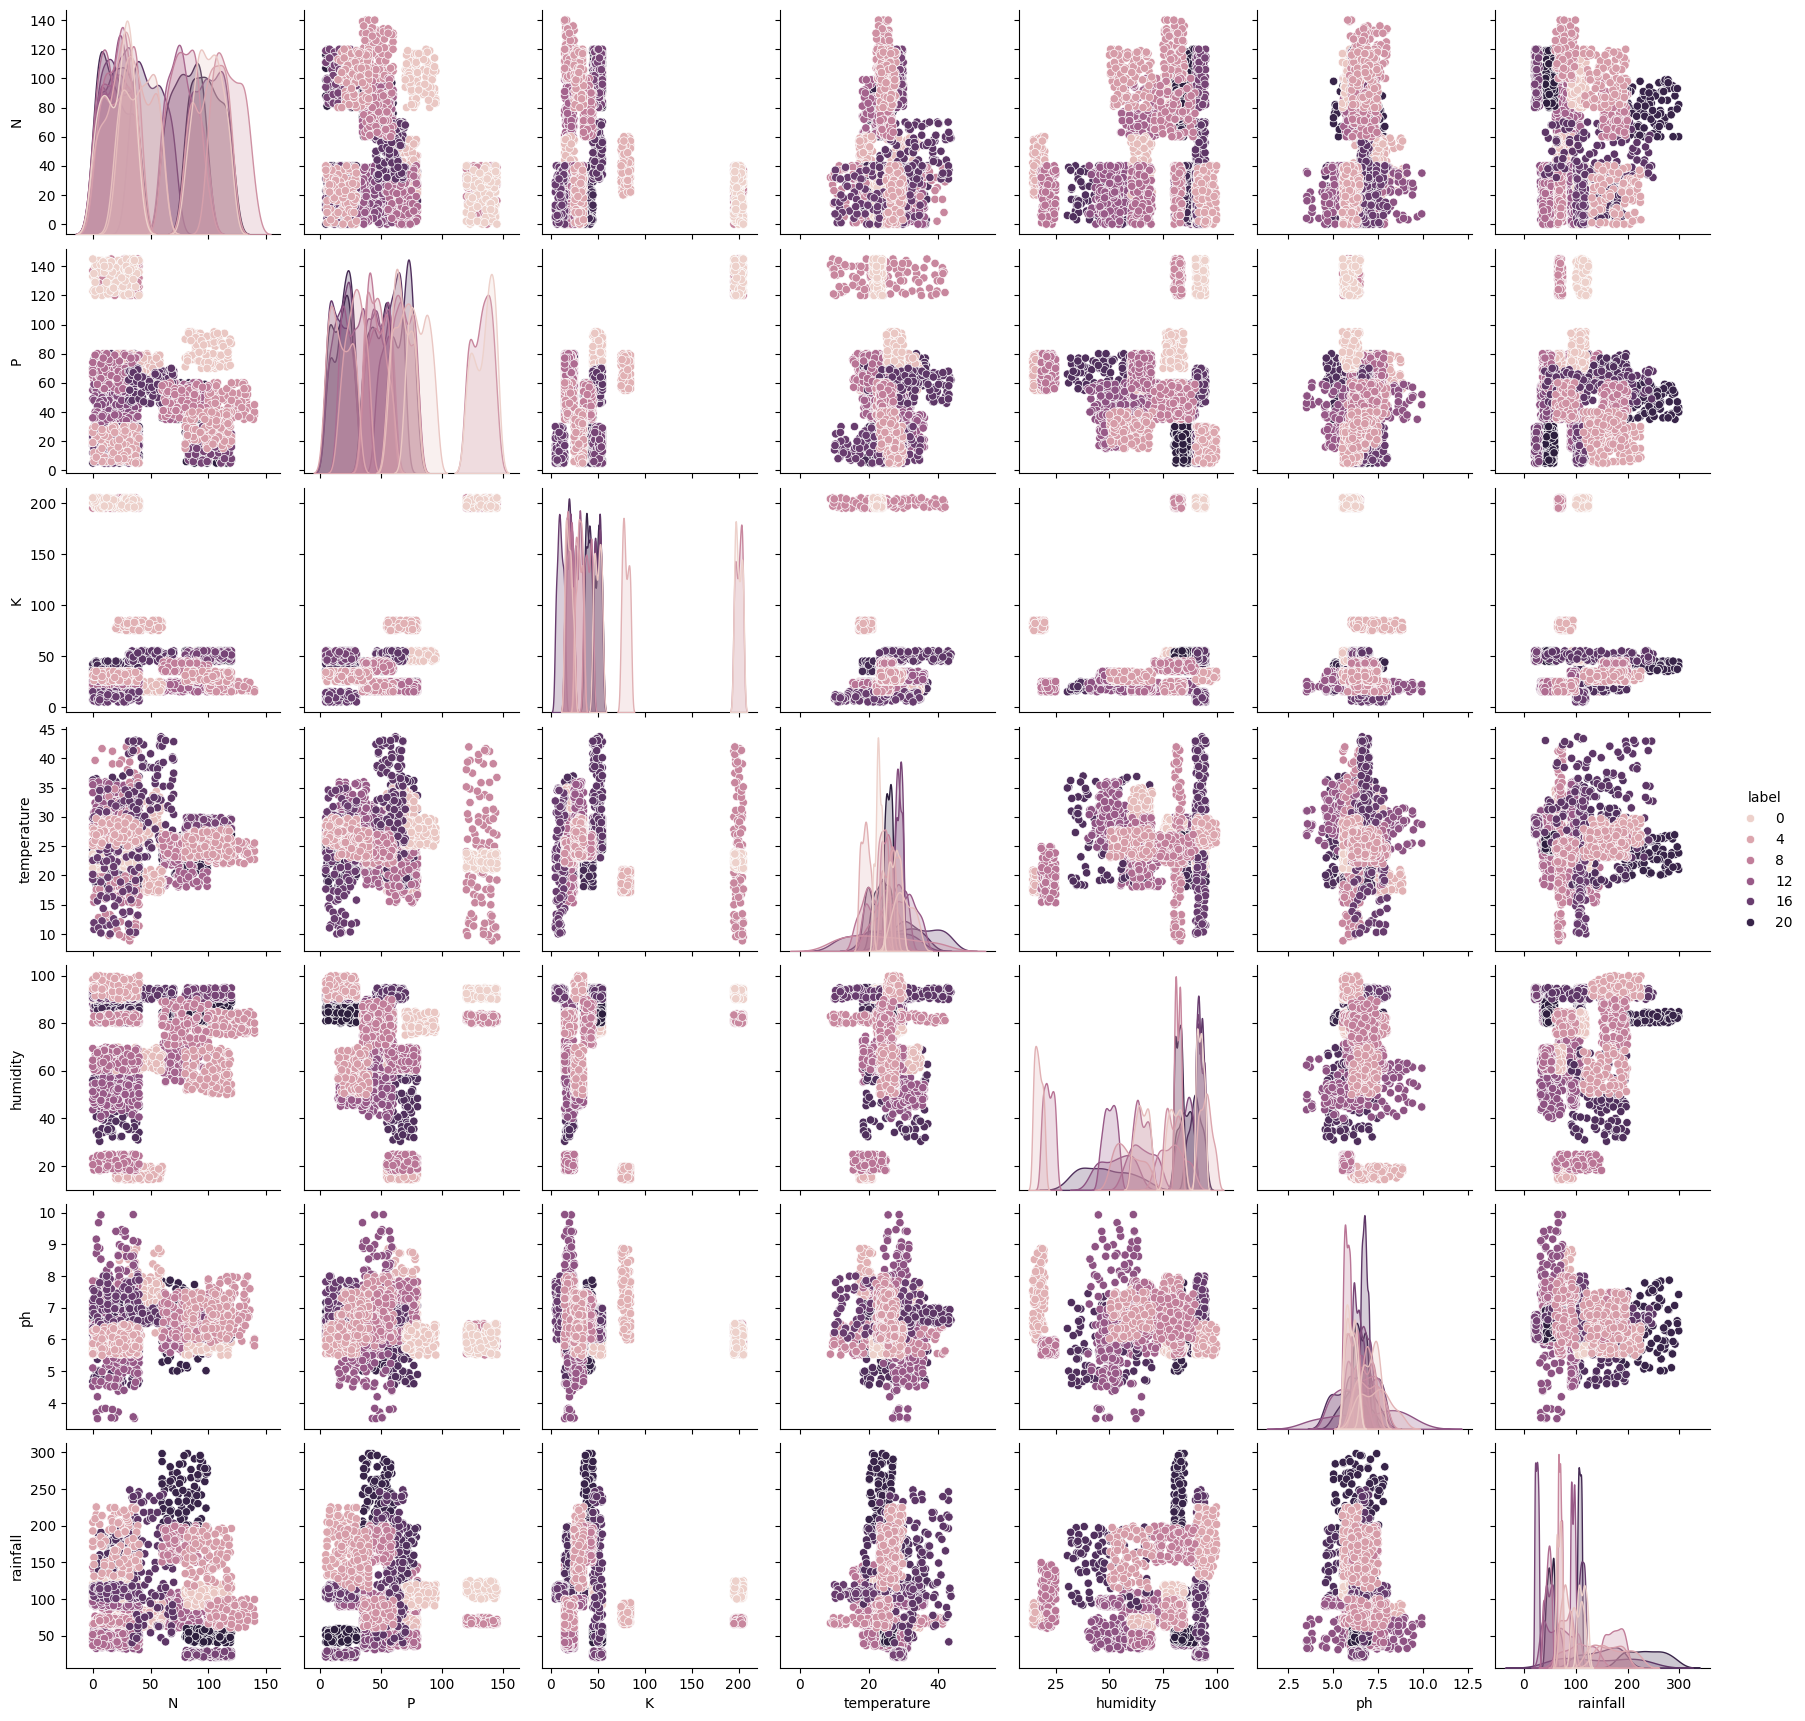

In [ ]:
# Pair Plot
sns.pairplot(df, hue='label')  # \visualize pairplots


In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['label'], test_size=0.3, random_state=42)


In [ ]:
# Using KNN (K=1)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

pred = knn.predict(X_test)

pred

array([15, 21, 17, 17,  0, 12,  0, 13, 14, 10,  2,  4, 19,  8,  4, 19,  0,
        6, 17, 15,  5, 17, 16, 17,  3,  8, 14, 16, 18,  8, 19, 10,  8, 10,
        8,  2,  8,  3,  3,  9, 17, 12,  2, 11, 14, 11, 18,  4, 15,  6,  2,
        5,  7, 14,  5,  9,  6,  0,  1, 10, 21,  4, 10, 16, 17, 18, 16, 20,
       15, 18, 15,  4,  8,  1,  2, 17,  1,  6, 21, 16,  5,  3, 20, 13, 16,
       12,  5, 13,  2, 19, 11, 13,  6, 17, 18, 13,  9,  5, 10, 10,  4,  8,
       16, 15, 21,  9, 21,  1, 18, 13,  1,  8,  6, 19, 18,  3, 11,  4, 19,
       20, 18,  7,  2,  4,  3,  2,  4, 11,  1, 13,  1,  9, 19,  3,  4, 16,
       18,  1,  1,  0,  9, 15, 14, 13,  4, 11,  0,  4,  9, 13, 14, 10, 21,
       14, 18, 18, 18,  9, 11,  8,  3,  0, 16,  6, 20,  4,  7, 10, 21,  7,
        7,  2, 19,  3,  4, 11, 10,  7, 21,  8,  5,  5,  9,  8, 13,  9,  1,
        9,  4, 17, 17, 14, 12, 19, 21,  9, 11,  0,  2,  3,  7,  7,  1,  6,
       20, 19, 14,  1, 20, 14, 11,  3,  3,  3,  0,  8,  9, 17,  5,  2,  9,
       12, 12,  4, 17,  0

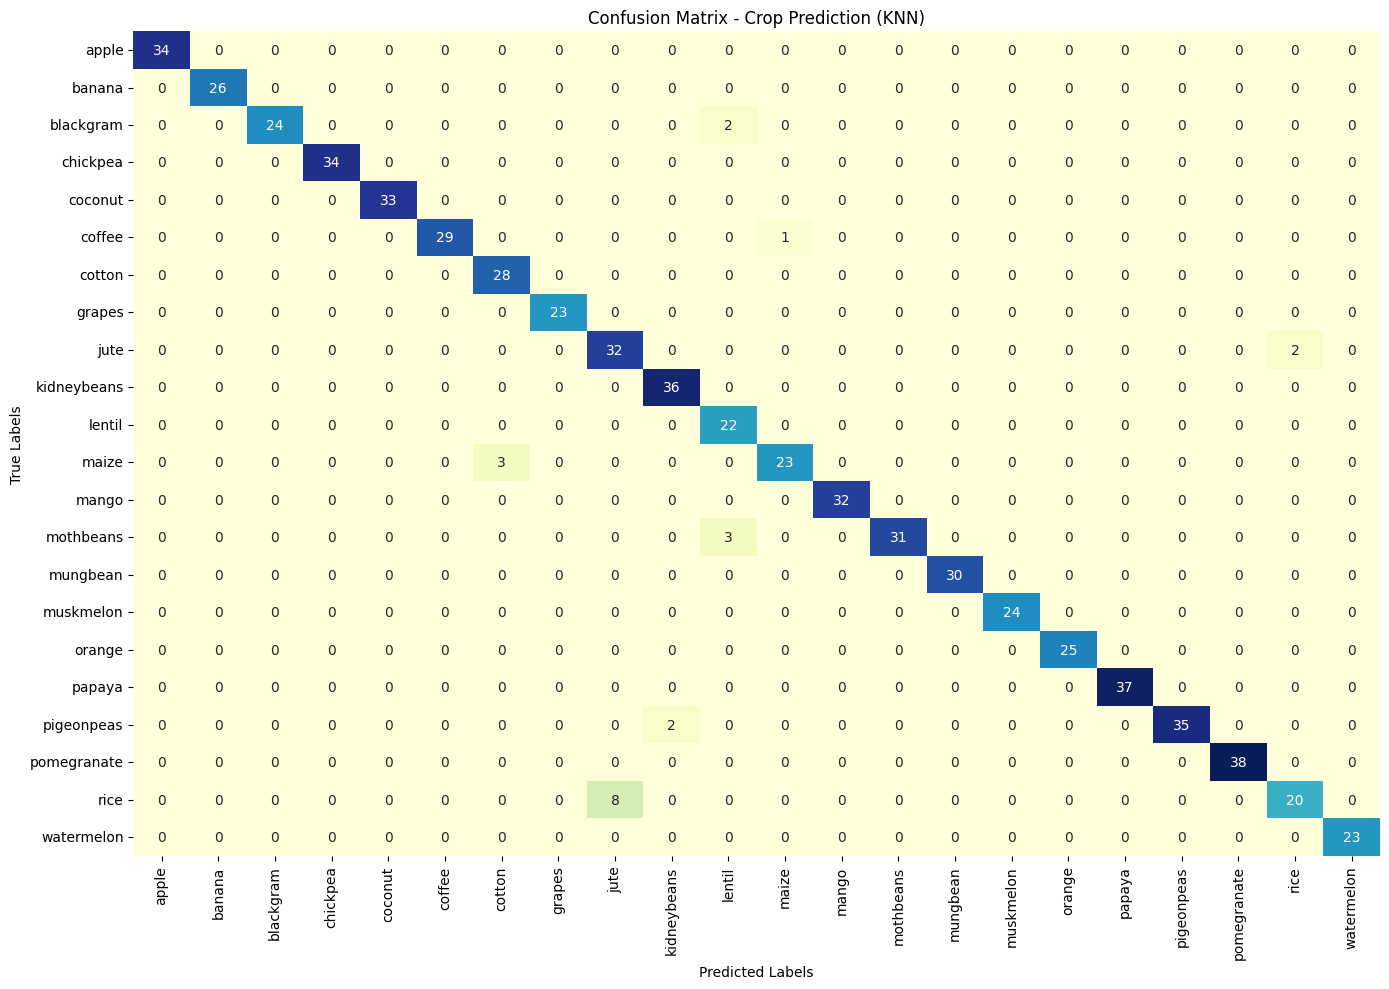

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        26
           2       1.00      0.92      0.96        26
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        33
           5       1.00      0.97      0.98        30
           6       0.90      1.00      0.95        28
           7       1.00      1.00      1.00        23
           8       0.80      0.94      0.86        34
           9       0.95      1.00      0.97        36
          10       0.81      1.00      0.90        22
          11       0.96      0.88      0.92        26
          12       1.00      1.00      1.00        32
          13       1.00      0.91      0.95        34
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        25
          17       1.00    

In [ ]:
# Predictions and Evaluations
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Crop Prediction (KNN)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


print(classification_report(y_test, pred))



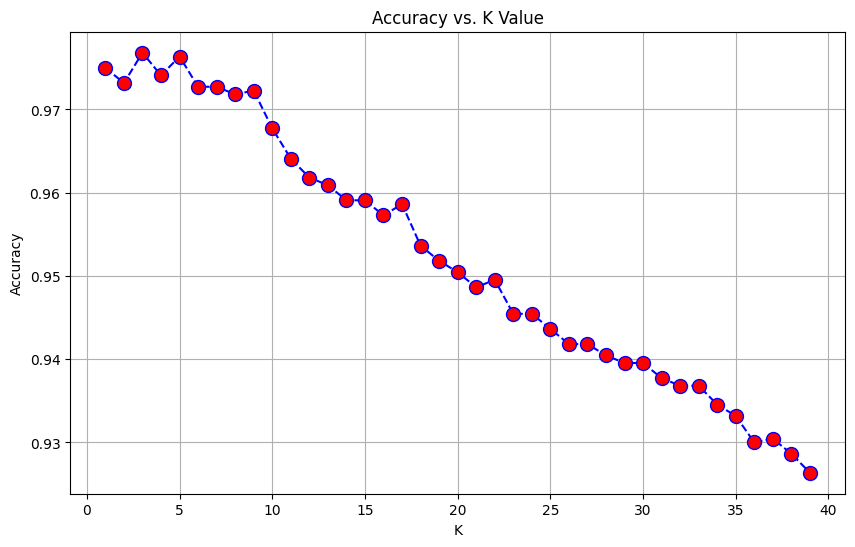

In [ ]:
# Choosing a K Value
accuracy_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, df_feat, df['label'], cv=10)
    accuracy_rate.append(score.mean())

# Plot Accuracy vs K
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), accuracy_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


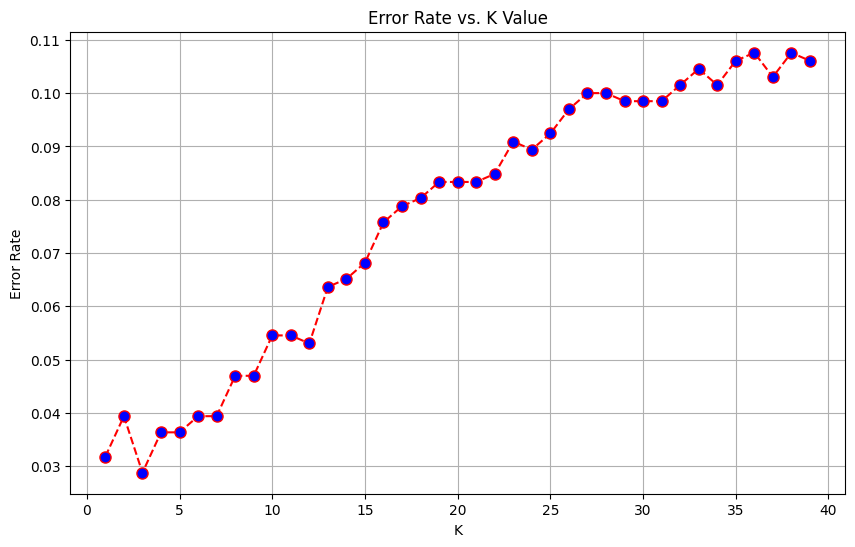

In [ ]:
# Calculate error rate for each K
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plot the error rate
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()


In [ ]:
# Best K Value
best_k = np.argmax(accuracy_rate) + 1
print("Best K value based on cross-validation:", best_k)


Best K value based on cross-validation: 3


WITH K=1

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        26
           2       1.00      0.92      0.96        26
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        33
           5       1.00      0.97      0.98        30
           6       0.90      1.00      0.95        28
           7       1.00      1.00      1.00        23
           8       0.80      0.94      0.86        34
           9       0.95      1.00      0.97        36
          10       0.81      1.00      0.90        22
          11       0.96      0.88      0.92        26
          12       1.00      1.00      1.00        32
          13       1.00      0.91      0.95        34
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00     

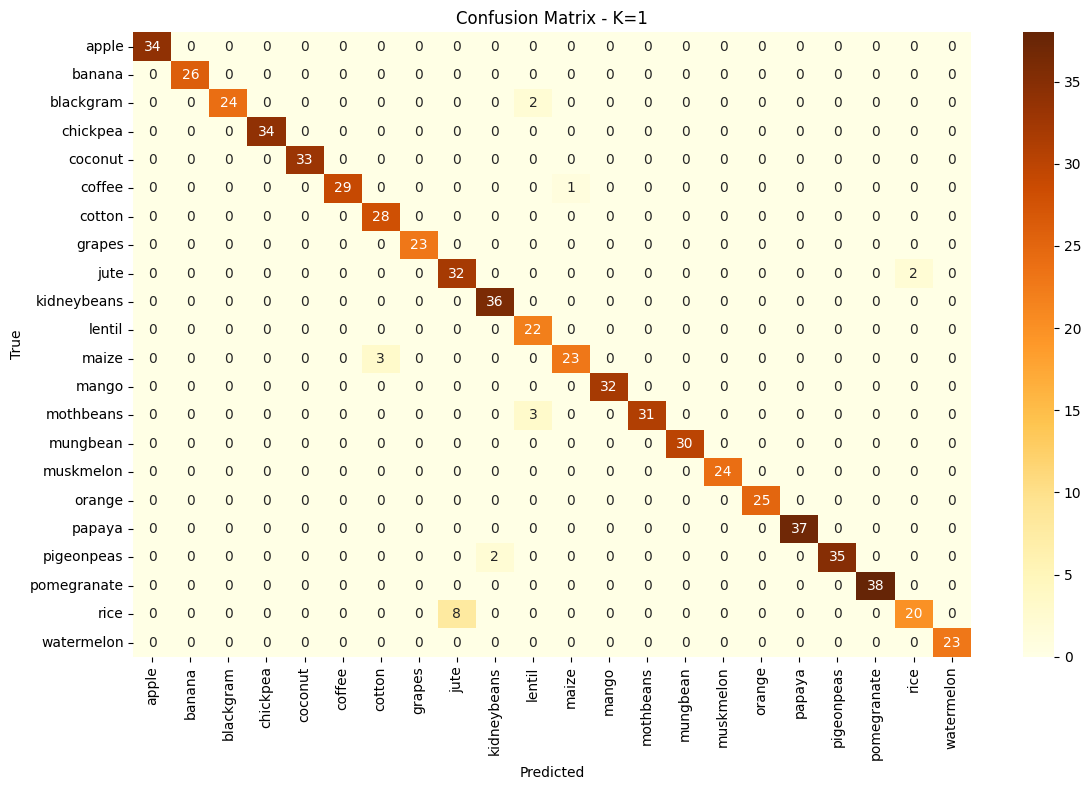

In [ ]:
from sklearn.metrics import accuracy_score

# KNN with K=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\nClassification Report:')
print(classification_report(y_test, pred))
print(f'Accuracy Score: {accuracy_score(y_test, pred)}')

print('\nConfusion Matrix:')
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt="d", cmap="YlOrBr",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - K=1")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

WITH K=3

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        26
           2       0.96      0.96      0.96        26
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        33
           5       0.97      0.97      0.97        30
           6       0.97      1.00      0.98        28
           7       1.00      1.00      1.00        23
           8       0.82      0.97      0.89        34
           9       0.95      1.00      0.97        36
          10       0.85      1.00      0.92        22
          11       0.96      0.96      0.96        26
          12       0.94      1.00      0.97        32
          13       1.00      0.91      0.95        34
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00     

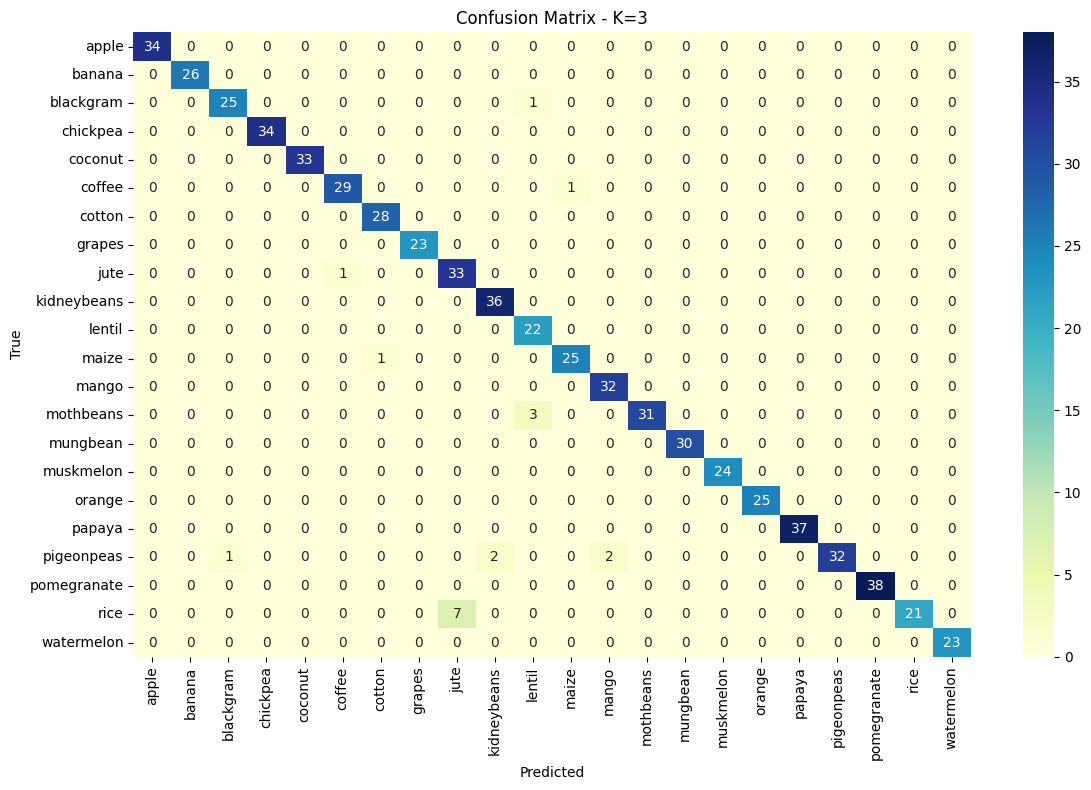

In [ ]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(f'WITH K={best_k}')
print('\nClassification Report:')
print(classification_report(y_test, pred))
print(f'Accuracy Score: {accuracy_score(y_test, pred)}')

print('\nConfusion Matrix:')
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt="d", cmap="YlGnBu",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix - K={best_k}")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

###**Regression**


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

crop = pd.read_csv("/content/drive/MyDrive/Classroom/CS530 Jan 2025/PROJECT/Crop_recommendation.csv")

le = LabelEncoder()
crop['label_encoded'] = le.fit_transform(crop['label'])

#  features and target
X = crop.drop(['label', 'label_encoded'], axis=1)
y = crop['label_encoded']


In [ ]:
from sklearn.model_selection import train_test_split

# training and testing
X_train, X_test, y_train, y_test = train_test_split(    X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# initialize and train the KNN Regressor (k=3)
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train, y_train)

y_pred = knn_reg.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# print evaluation metrics
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R2 Score: 0.9343310264997735
Mean Squared Error: 2.6553872053872056


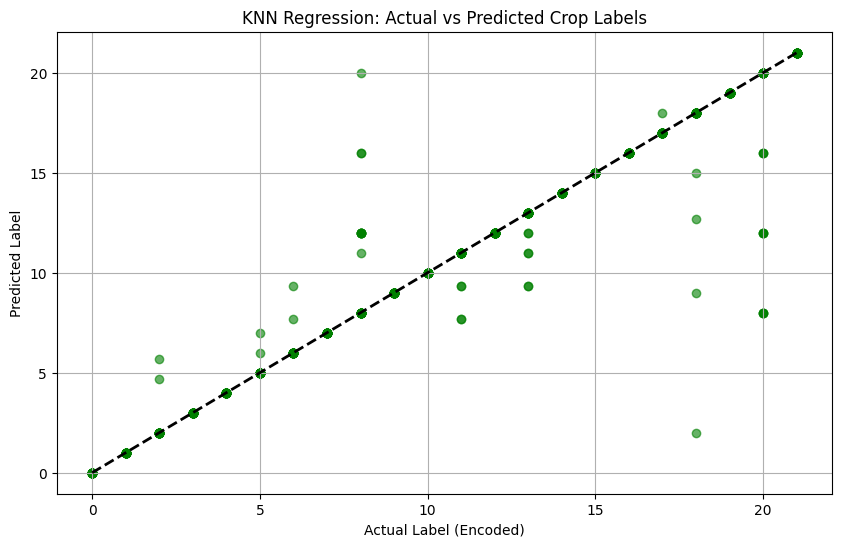

In [ ]:
import matplotlib.pyplot as plt

# plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Label (Encoded)")
plt.ylabel("Predicted Label")
plt.title("KNN Regression: Actual vs Predicted Crop Labels")
plt.grid(True)
plt.show()


##**Decision Trees**

###**Classification**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#visualization
import seaborn as sns

crop = pd.read_csv("/content/drive/MyDrive/Classroom/CS530 Jan 2025/PROJECT/Crop_recommendation.csv")
crop.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [ ]:
# independent features and dependent features
X = crop.iloc[:, :-1]  # all columns except label
y = crop['label']      # target column
X, y

(        N   P   K  temperature   humidity        ph    rainfall
 0      90  42  43    20.879744  82.002744  6.502985  202.935536
 1      85  58  41    21.770462  80.319644  7.038096  226.655537
 2      60  55  44    23.004459  82.320763  7.840207  263.964248
 3      74  35  40    26.491096  80.158363  6.980401  242.864034
 4      78  42  42    20.130175  81.604873  7.628473  262.717340
 ...   ...  ..  ..          ...        ...       ...         ...
 2195  107  34  32    26.774637  66.413269  6.780064  177.774507
 2196   99  15  27    27.417112  56.636362  6.086922  127.924610
 2197  118  33  30    24.131797  67.225123  6.362608  173.322839
 2198  117  32  34    26.272418  52.127394  6.758793  127.175293
 2199  104  18  30    23.603016  60.396475  6.779833  140.937041
 
 [2200 rows x 7 columns],
 0         rice
 1         rice
 2         rice
 3         rice
 4         rice
          ...  
 2195    coffee
 2196    coffee
 2197    coffee
 2198    coffee
 2199    coffee
 Name: label, Le

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

X_train

N    P    K  temperature   humidity        ph    rainfall
1374   81   16   45    26.904357  86.254262  6.727468   59.759800
1245   31  136  197    31.110473  83.340110  5.653776   71.430016
831     3   63   16    24.380419  61.184582  6.868882   53.139467
710    39   73   24    25.658425  61.182358  7.224059   69.286078
15     60   48   39    24.282094  80.300256  7.042299  231.086335
...   ...  ...  ...          ...        ...       ...         ...
1638   10    5    5    21.213070  91.353492  7.817846  112.983436
1095  108   94   47    27.359116  84.546250  6.387431   90.812505
1130   11   36   31    27.920633  51.779659  6.475449  100.258567
1294   11  124  204    13.429886  80.066340  6.361141   71.400430
860    32   78   22    23.970814  62.355576  7.007038   53.409060

[1474 rows x 7 columns]

In [ ]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

#### **Postpruning**

In [ ]:
treemodel = DecisionTreeClassifier()

# train the model
treemodel.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.62734375, 0.96875, 'x[6] <= 30.393\ngini = 0.954\nsamples = 1474\nvalue = [62.0, 72.0, 71.0, 59.0, 65.0, 67.0, 67.0, 75.0, 65.0\n59.0, 72.0, 68.0, 66.0, 62.0, 67.0, 74.0, 73.0, 63.0\n59.0, 60.0, 71.0, 77.0]'),
 Text(0.60234375, 0.90625, 'gini = 0.0\nsamples = 74\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 74, 0, 0, 0, 0, 0, 0]'),
 Text(0.6148437499999999, 0.9375, 'True  '),
 Text(0.65234375, 0.90625, 'x[1] <= 107.5\ngini = 0.952\nsamples = 1400\nvalue = [62.0, 72.0, 71.0, 59.0, 65.0, 67.0, 67.0, 75.0, 65.0\n59.0, 72.0, 68.0, 66.0, 62.0, 67.0, 0.0, 73.0, 63.0\n59.0, 60.0, 71.0, 77.0]'),
 Text(0.63984375, 0.9375, '  False'),
 Text(0.60234375, 0.84375, 'x[2] <= 14.5\ngini = 0.947\nsamples = 1263\nvalue = [0, 72, 71, 59, 65, 67, 67, 0, 65, 59, 72, 68\n66, 62, 67, 0, 73, 63, 59, 60, 71, 77]'),
 Text(0.57734375, 0.78125, 'gini = 0.0\nsamples = 66\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 66, 0, 0, 0, 0, 0]'),
 Text(0.62734375, 0.78125, 'x[2] <= 35.5\ngini =

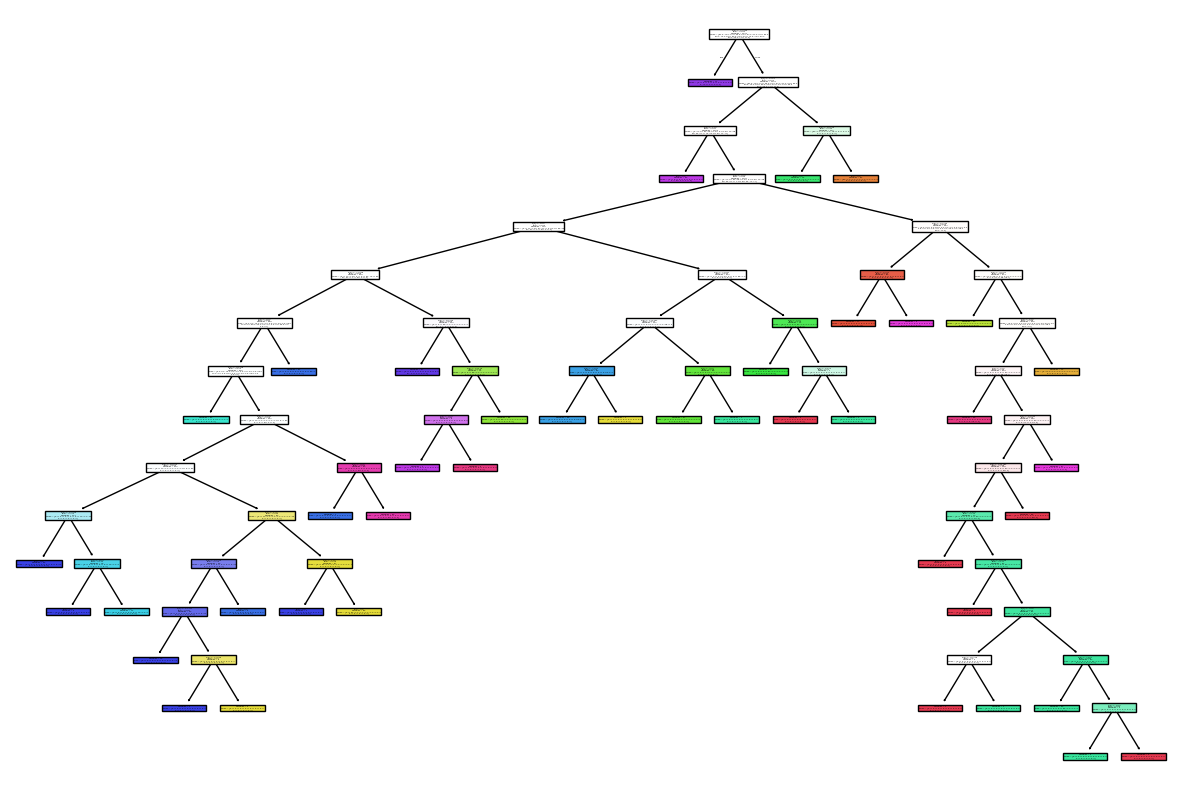

In [ ]:
# plotting the decision tree
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(treemodel, filled=True)

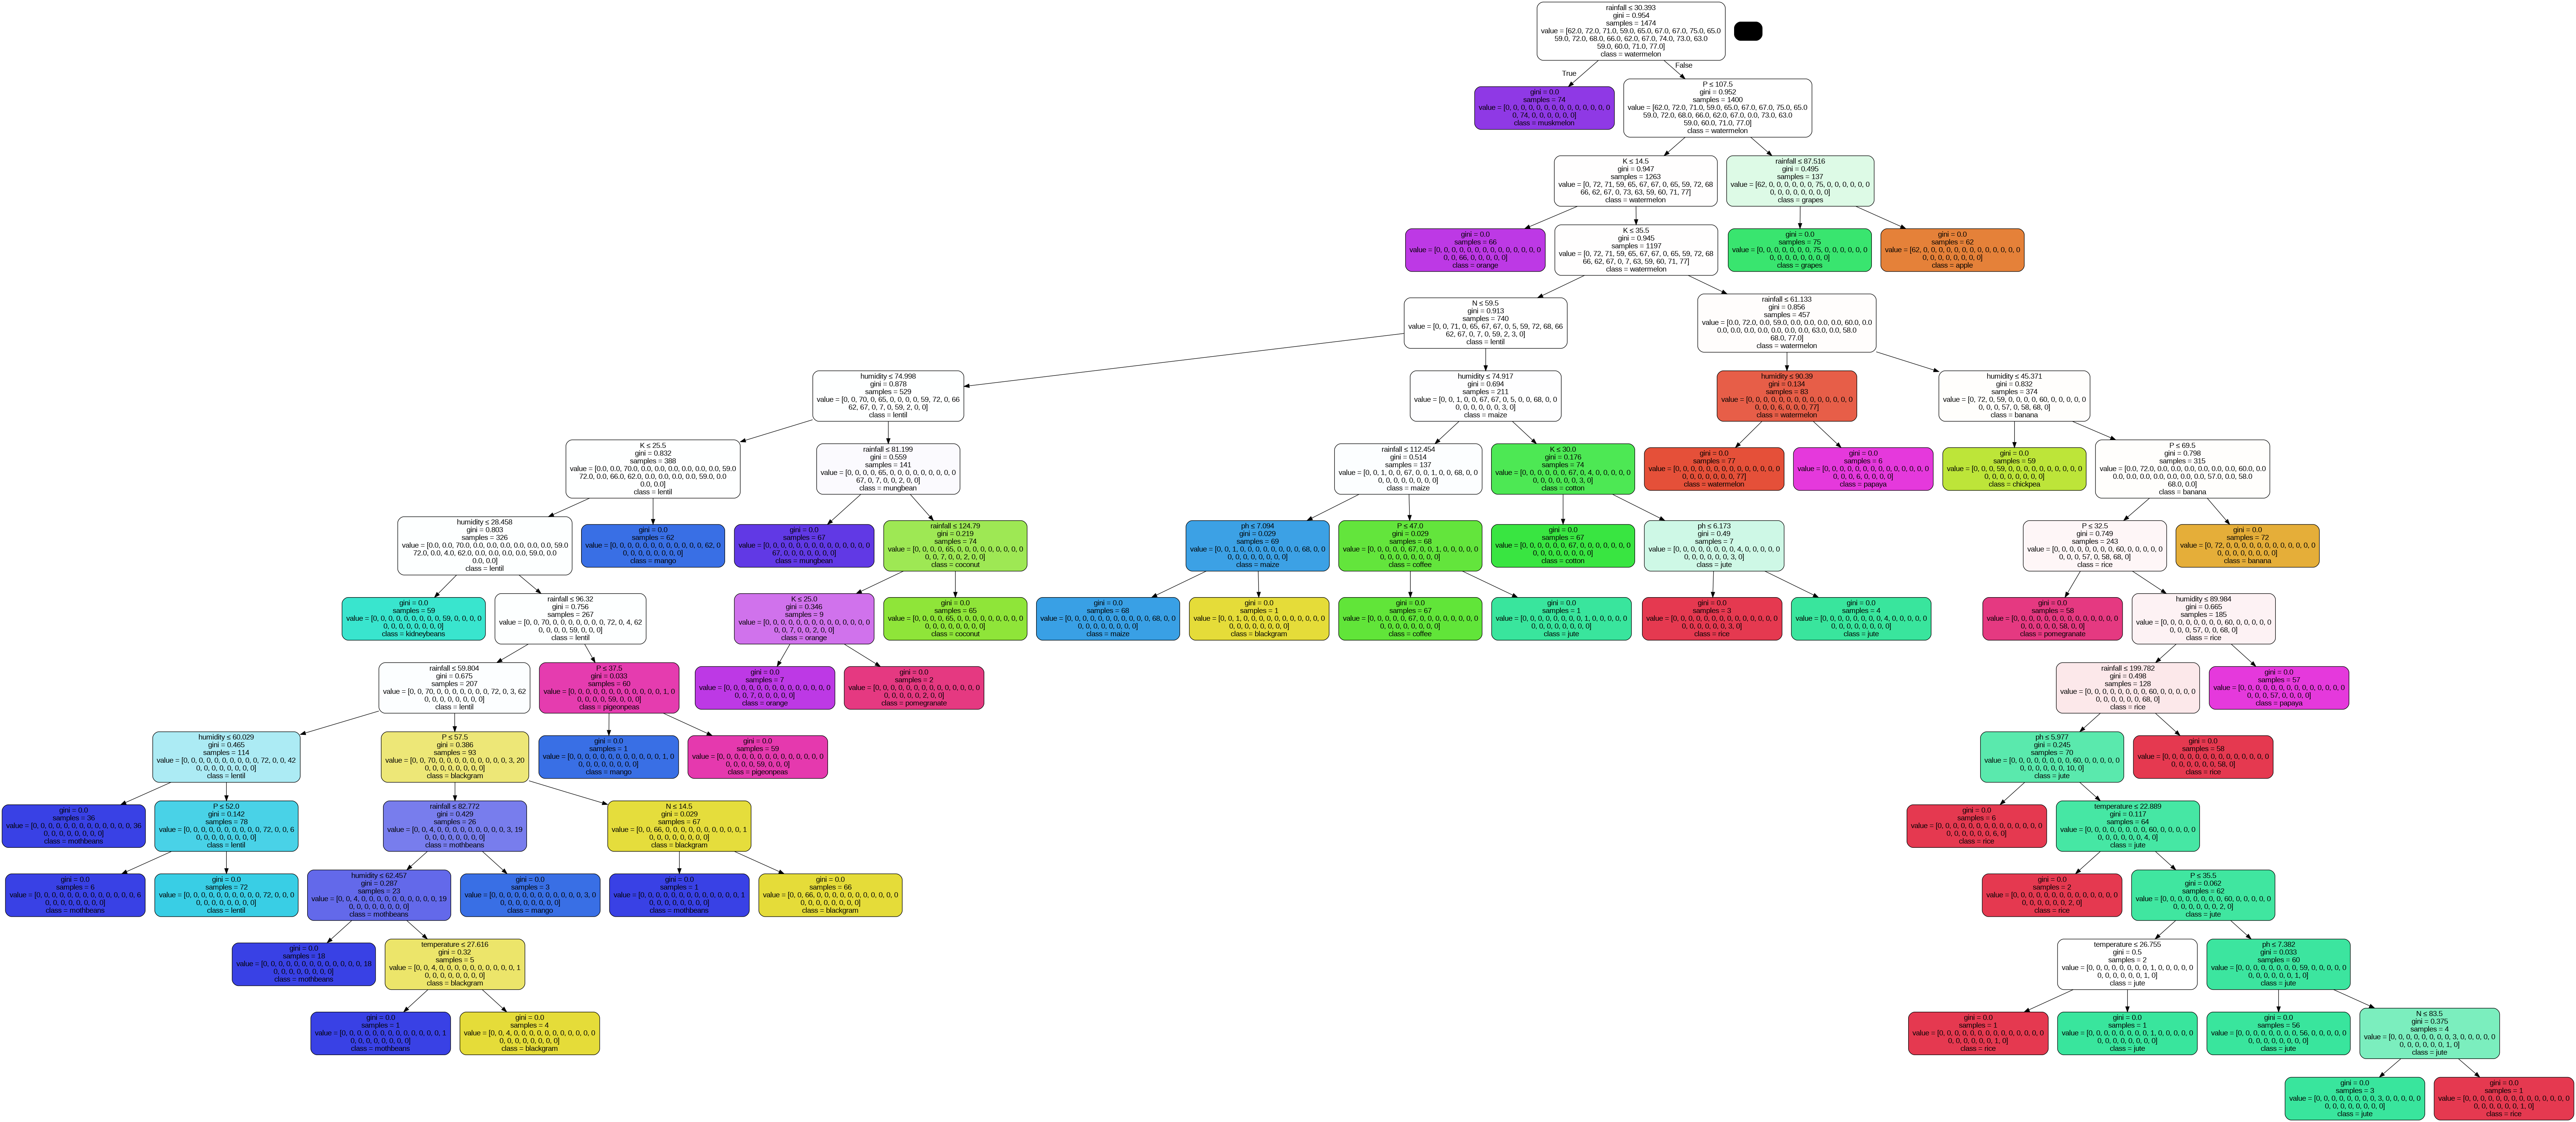

In [ ]:

#Cleaning above tree
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from io import StringIO

# Create DOT data
dot_data = StringIO()
export_graphviz(treemodel,
                out_file=dot_data,
                feature_names=X.columns,
                class_names=treemodel.classes_,
                filled=True,
                rounded=True,
                special_characters=True)

# Draw graph using pydotplus
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


[Text(0.6088709677419355, 0.95, 'x[6] <= 30.393\ngini = 0.954\nsamples = 1474\nvalue = [62.0, 72.0, 71.0, 59.0, 65.0, 67.0, 67.0, 75.0, 65.0\n59.0, 72.0, 68.0, 66.0, 62.0, 67.0, 74.0, 73.0, 63.0\n59.0, 60.0, 71.0, 77.0]'),
 Text(0.5766129032258065, 0.85, 'gini = 0.0\nsamples = 74\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 74, 0, 0, 0, 0, 0, 0]'),
 Text(0.592741935483871, 0.8999999999999999, 'True  '),
 Text(0.6411290322580645, 0.85, 'x[2] <= 140.0\ngini = 0.952\nsamples = 1400\nvalue = [62.0, 72.0, 71.0, 59.0, 65.0, 67.0, 67.0, 75.0, 65.0\n59.0, 72.0, 68.0, 66.0, 62.0, 67.0, 0.0, 73.0, 63.0\n59.0, 60.0, 71.0, 77.0]'),
 Text(0.625, 0.8999999999999999, '  False'),
 Text(0.5766129032258065, 0.75, 'x[2] <= 14.5\ngini = 0.947\nsamples = 1263\nvalue = [0, 72, 71, 59, 65, 67, 67, 0, 65, 59, 72, 68\n66, 62, 67, 0, 73, 63, 59, 60, 71, 77]'),
 Text(0.5443548387096774, 0.65, 'gini = 0.0\nsamples = 66\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 66, 0, 0, 0, 0, 0]'),
 Text

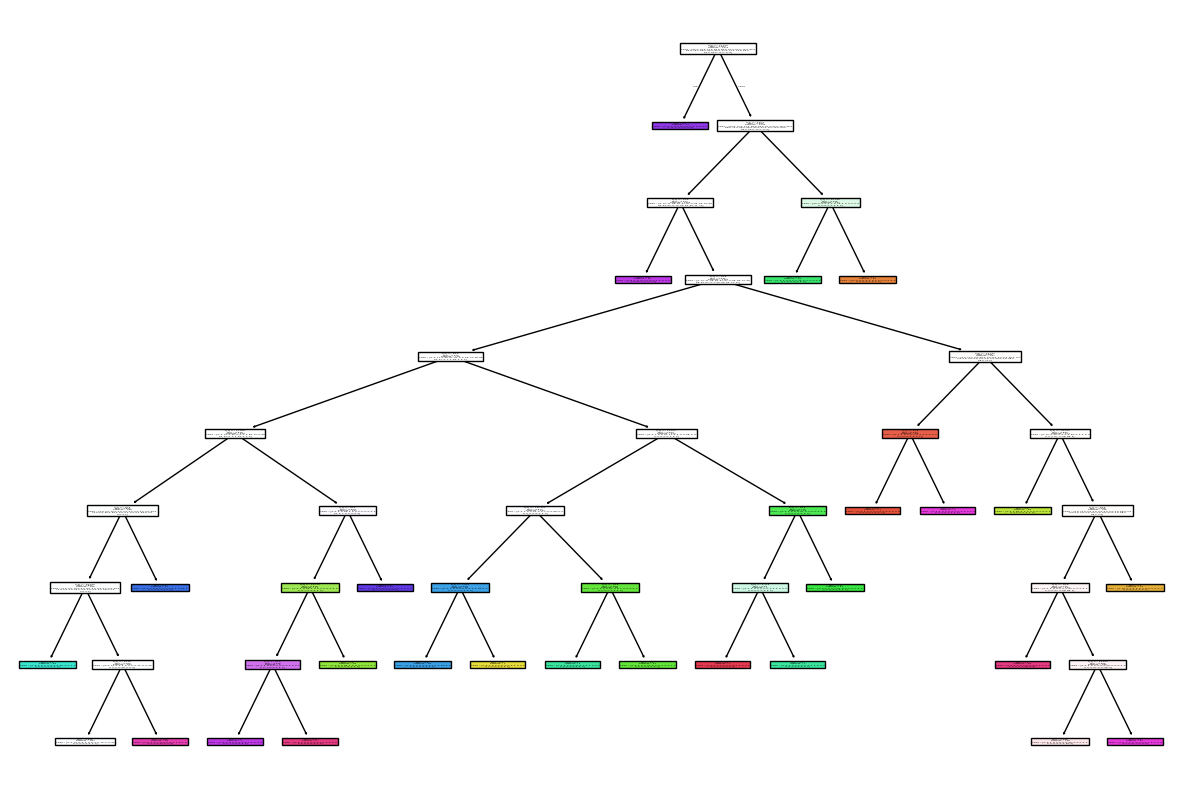

In [ ]:
# maxdepth = 9
treemodel = DecisionTreeClassifier(max_depth=9)

# train the model again with pruning
treemodel.fit(X_train, y_train)

# plotting the pruned decision tree
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(treemodel, filled=True)

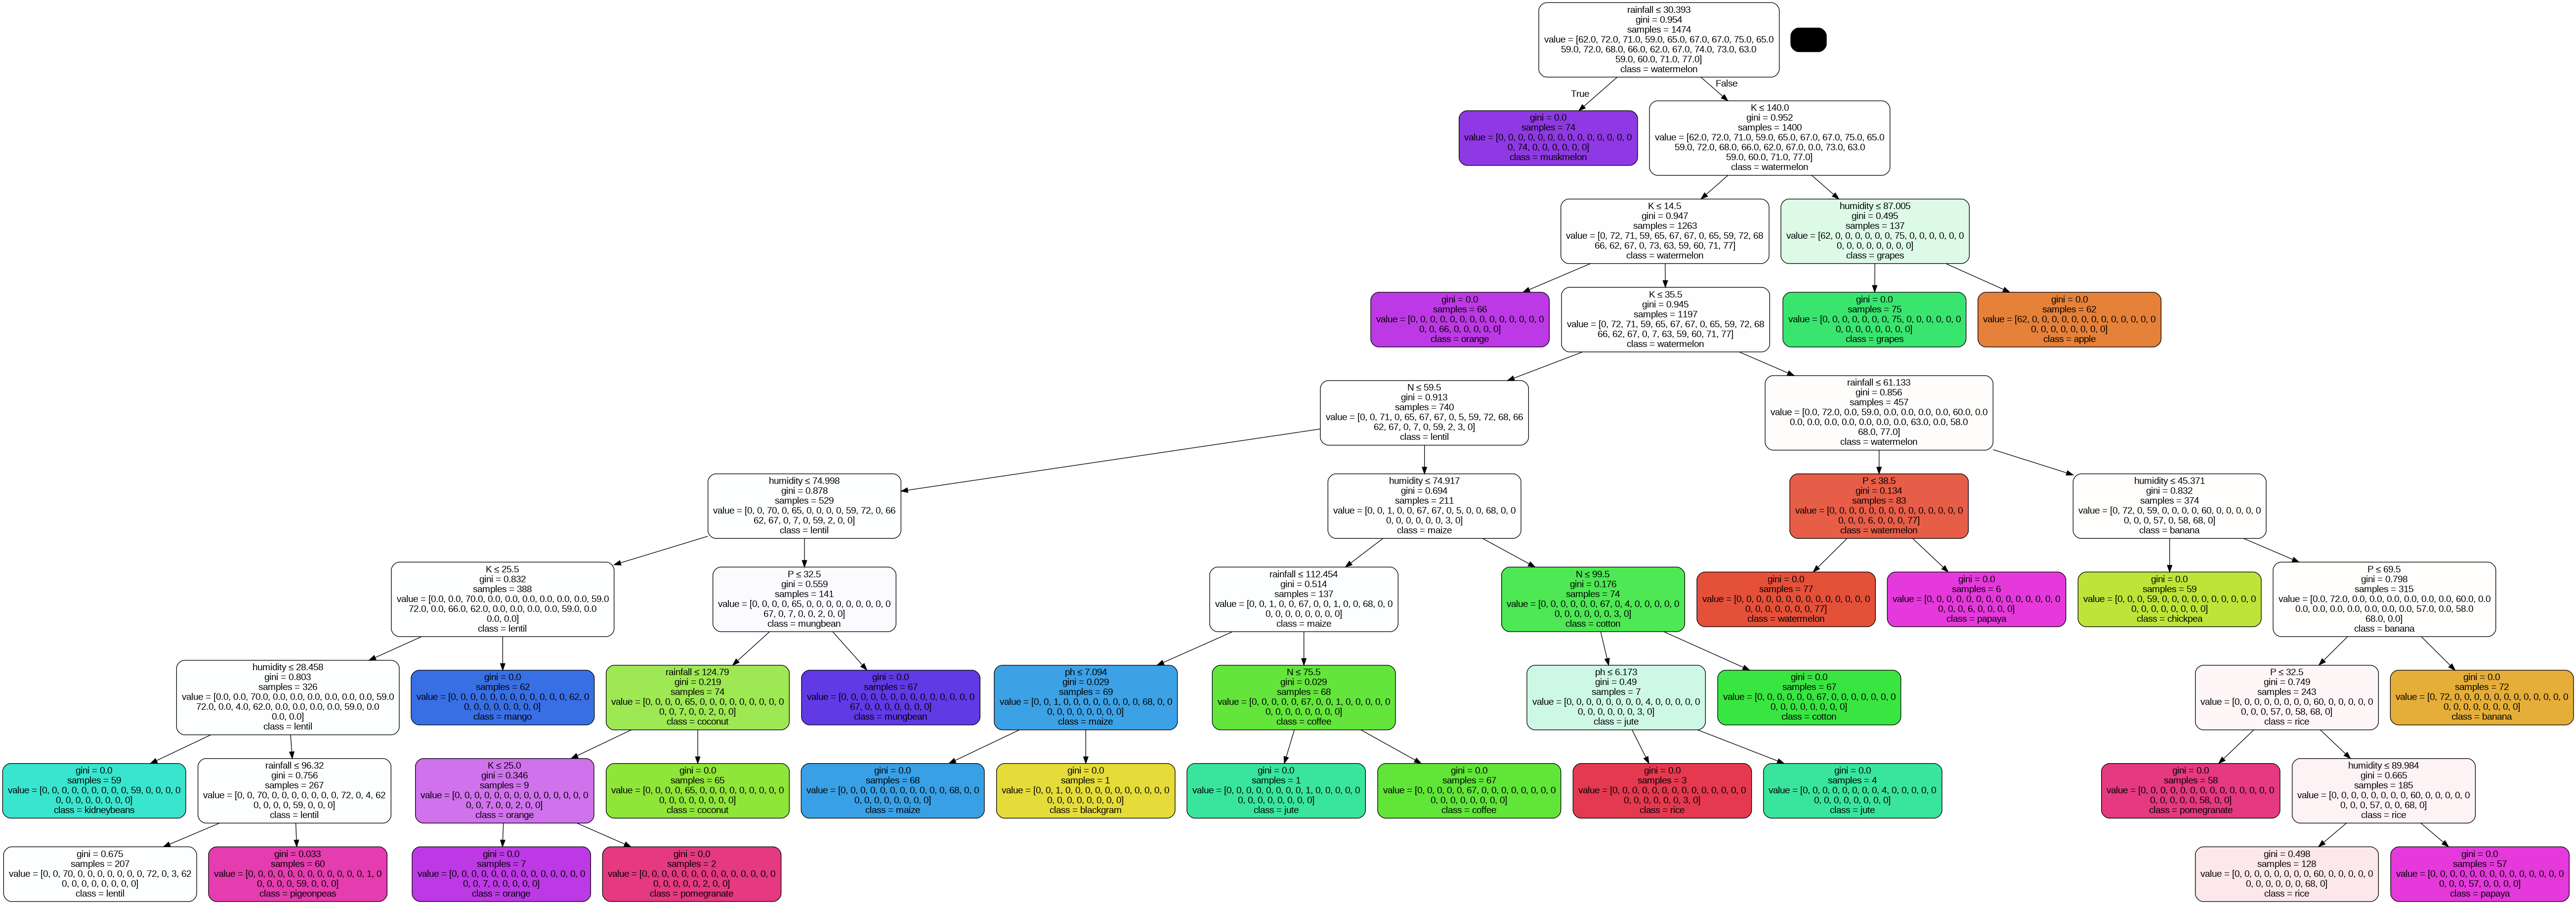

In [ ]:

#Cleaning above tree
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from io import StringIO

# Create DOT data
dot_data = StringIO()
export_graphviz(treemodel,
                out_file=dot_data,
                feature_names=X.columns,
                class_names=treemodel.classes_,
                filled=True,
                rounded=True,
                special_characters=True)

# Draw graph using pydotplus
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [ ]:
# Prediction
y_pred = treemodel.predict(X_test)
y_pred

array(['muskmelon', 'watermelon', 'papaya', 'papaya', 'apple', 'mango',
       'apple', 'lentil', 'mungbean', 'lentil', 'lentil', 'coconut',
       'pomegranate', 'jute', 'coconut', 'pomegranate', 'apple', 'maize',
       'papaya', 'muskmelon', 'coffee', 'papaya', 'orange', 'papaya',
       'chickpea', 'rice', 'mungbean', 'orange', 'pigeonpeas', 'rice',
       'pomegranate', 'lentil', 'rice', 'lentil', 'rice', 'lentil',
       'rice', 'chickpea', 'chickpea', 'kidneybeans', 'papaya', 'mango',
       'lentil', 'maize', 'mungbean', 'maize', 'pigeonpeas', 'coconut',
       'muskmelon', 'maize', 'lentil', 'coffee', 'grapes', 'mungbean',
       'coffee', 'kidneybeans', 'cotton', 'apple', 'banana', 'lentil',
       'watermelon', 'coconut', 'lentil', 'orange', 'papaya', 'lentil',
       'orange', 'rice', 'muskmelon', 'pigeonpeas', 'muskmelon',
       'coconut', 'rice', 'banana', 'lentil', 'papaya', 'banana',
       'cotton', 'watermelon', 'orange', 'coffee', 'chickpea', 'rice',
       'lentil'

In [ ]:
# Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y_pred, y_test)
print(score)

0.8526170798898072


In [ ]:
print(classification_report(y_pred, y_test))


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        38
      banana       1.00      1.00      1.00        28
   blackgram       0.00      0.00      0.00         0
    chickpea       1.00      1.00      1.00        41
     coconut       1.00      1.00      1.00        35
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        33
      grapes       1.00      1.00      1.00        25
        jute       0.17      0.75      0.28         8
 kidneybeans       1.00      1.00      1.00        41
      lentil       1.00      0.27      0.43       102
       maize       1.00      1.00      1.00        32
       mango       0.91      1.00      0.95        31
   mothbeans       0.00      0.00      0.00         0
    mungbean       1.00      1.00      1.00        33
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00        27
      papaya       1.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1200x800 with 0 Axes>

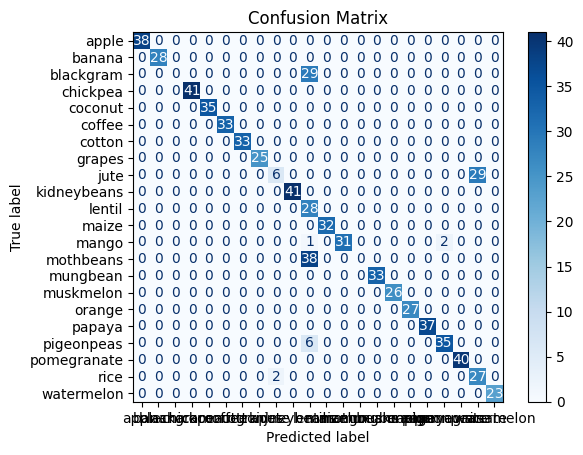

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=treemodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=treemodel.classes_)

plt.figure(figsize=(12,8))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


#### **Preprunning**

In [ ]:
## Preprunning

#  dictionary of hyperparameters for GridSearchCV
parameter={
 'criterion':['gini','entropy','log_loss'],  #  functions to measure the quality of a split
 'splitter':['best','random'],               # used to split nodes: 'best' chooses best split, 'random' chooses randomly
 'max_depth':[4,5,6,7,8],                    # Maximum depth of the tree (controls complexity / overfitting)
 'max_features':['auto', 'sqrt', 'log2']     # Number of features to consider when looking for the best split
}

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create base DecisionTree model
treemodel=DecisionTreeClassifier()

In [ ]:
# Perform Grid Search with 5-fold cross-validation and 'accuracy' scoring
# 1000 samples -> it make like 1000/2 = 200 test sample all other train =>  200 - - - - | - 200 - - - | - - 200 - -  | - - - 200 - | - - - - 200 |
cv=GridSearchCV(treemodel, param_grid=parameter, cv=5, scoring='accuracy')

In [ ]:
cv.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
#  best parameters from the grid search
cv.best_params_

{'criterion': 'log_loss',
 'max_depth': 8,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [ ]:
y_test

1451      muskmelon
1334     watermelon
1761         papaya
1735         papaya
1576          apple
           ...     
136           maize
518       mothbeans
845          lentil
334     kidneybeans
1029         banana
Name: label, Length: 726, dtype: object

In [ ]:
y_pred=cv.predict(X_test)

y_pred


array(['muskmelon', 'watermelon', 'papaya', 'banana', 'apple', 'mango',
       'apple', 'lentil', 'mungbean', 'lentil', 'blackgram', 'coconut',
       'pomegranate', 'jute', 'coconut', 'pomegranate', 'apple', 'maize',
       'papaya', 'muskmelon', 'coffee', 'papaya', 'orange', 'papaya',
       'chickpea', 'jute', 'mungbean', 'orange', 'pigeonpeas', 'rice',
       'pomegranate', 'lentil', 'jute', 'lentil', 'jute', 'blackgram',
       'jute', 'chickpea', 'chickpea', 'kidneybeans', 'papaya', 'mango',
       'blackgram', 'maize', 'mungbean', 'maize', 'pigeonpeas', 'coconut',
       'muskmelon', 'maize', 'blackgram', 'coffee', 'grapes', 'mungbean',
       'coffee', 'kidneybeans', 'cotton', 'apple', 'banana', 'blackgram',
       'watermelon', 'coconut', 'lentil', 'orange', 'papaya',
       'pigeonpeas', 'orange', 'rice', 'muskmelon', 'pigeonpeas',
       'muskmelon', 'coconut', 'jute', 'banana', 'blackgram', 'papaya',
       'banana', 'cotton', 'watermelon', 'orange', 'coffee', 'chickpea',
 

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# accuracy score of predictions
score=accuracy_score(y_pred, y_test)
score

0.9366391184573003

In [ ]:
# classification report (precision, recall, f1-score)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        38
      banana       1.00      0.93      0.97        30
   blackgram       1.00      0.78      0.88        37
    chickpea       1.00      1.00      1.00        41
     coconut       1.00      1.00      1.00        35
      coffee       0.97      1.00      0.98        32
      cotton       1.00      1.00      1.00        33
      grapes       1.00      1.00      1.00        25
        jute       0.94      0.75      0.84        44
 kidneybeans       1.00      1.00      1.00        41
      lentil       1.00      0.61      0.76        46
       maize       1.00      1.00      1.00        32
       mango       0.94      1.00      0.97        32
   mothbeans       0.50      0.90      0.64        21
    mungbean       1.00      1.00      1.00        33
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      0.90      0.95        30
      papaya       0.92    

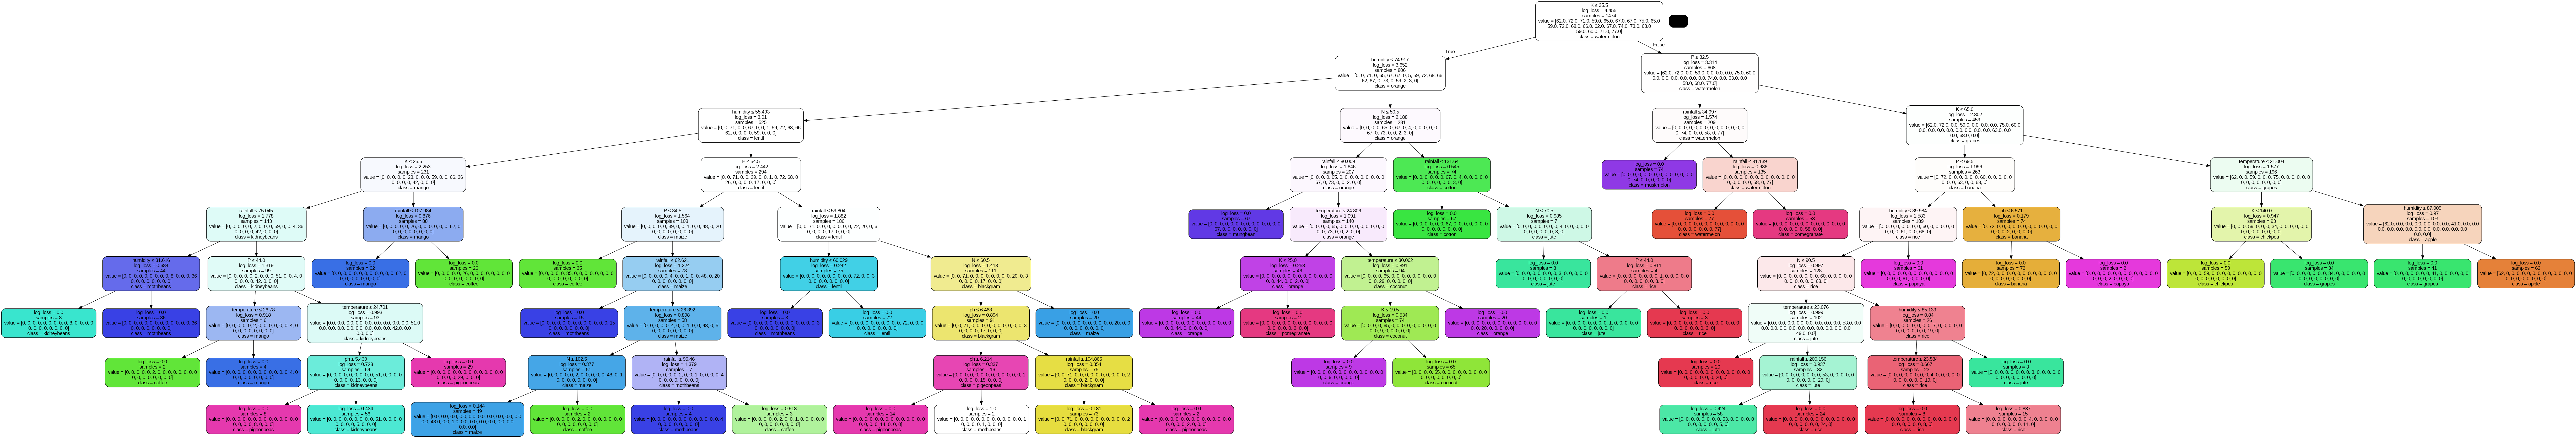

In [ ]:
###  Best Decision Tree (Clean Graph)
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from io import StringIO

# Train the tree again with best parameters
best_tree = DecisionTreeClassifier(**cv.best_params_)
best_tree.fit(X_train, y_train)

# Create DOT format for tree
dot_data = StringIO()
export_graphviz(best_tree,
                out_file=dot_data,
                feature_names=X.columns,
                class_names=best_tree.classes_,
                filled=True,
                rounded=True,
                special_characters=True)

# Create and show tree image
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

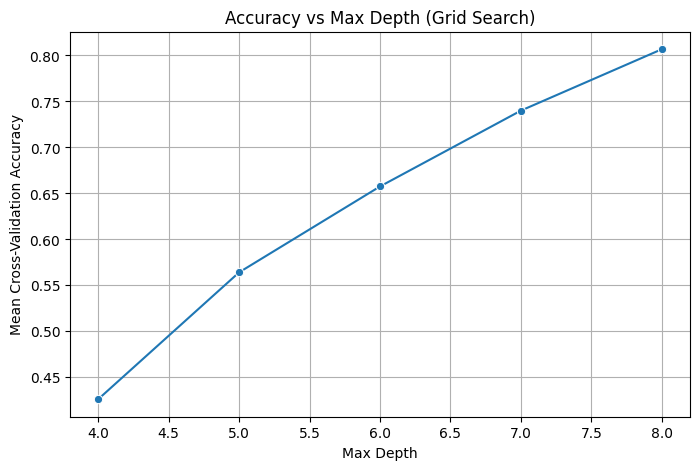

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#results into a DataFrame
results = pd.DataFrame(cv.cv_results_)

# Filter to only show different max_depth values for comparison
depth_acc = results[['param_max_depth', 'mean_test_score']].groupby('param_max_depth').mean().reset_index()

# Plot accuracy vs max_depth
plt.figure(figsize=(8, 5))
sns.lineplot(x='param_max_depth', y='mean_test_score', data=depth_acc, marker='o')
plt.title("Accuracy vs Max Depth (Grid Search)")
plt.xlabel("Max Depth")
plt.ylabel("Mean Cross-Validation Accuracy")
plt.grid(True)
plt.show()


<Figure size 1200x800 with 0 Axes>

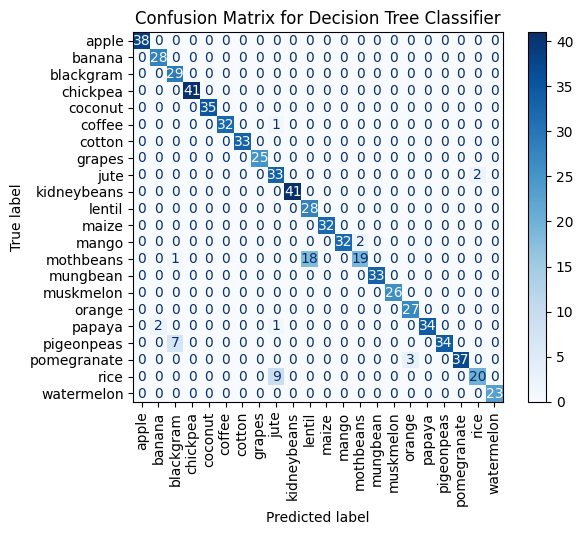

In [ ]:
#  confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=best_tree.classes_)


plt.figure(figsize=(12, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_tree.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=90)
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.grid(False)
plt.show()


###**Regression**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

crop = pd.read_csv("/content/drive/MyDrive/Classroom/CS530 Jan 2025/PROJECT/Crop_recommendation.csv")

# independent features
X = crop.iloc[:, :-1]
# dependent feature (target variable): convert labels to numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(crop['label'])

X.head()

N   P   K  temperature   humidity        ph    rainfall
0  90  42  43    20.879744  82.002744  6.502985  202.935536
1  85  58  41    21.770462  80.319644  7.038096  226.655537
2  60  55  44    23.004459  82.320763  7.840207  263.964248
3  74  35  40    26.491096  80.158363  6.980401  242.864034
4  78  42  42    20.130175  81.604873  7.628473  262.717340

In [ ]:
### train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

In [ ]:
regressor.fit(X_train, y_train)


DecisionTreeRegressor()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([15., 21., 17., 17.,  0., 12.,  0., 13., 14., 10.,  2.,  4., 19.,
        8.,  4., 19.,  0., 11., 17., 15.,  5., 17., 16., 17.,  3.,  8.,
       14., 16., 18., 20., 19., 13.,  8., 10.,  8.,  2.,  8.,  3.,  3.,
        9., 17., 12.,  2., 11., 14., 11., 18.,  4., 15., 11.,  2.,  5.,
        7., 14.,  5.,  9.,  6.,  0.,  1.,  2., 21.,  4., 10., 16., 17.,
        2., 16., 20., 15., 18., 15.,  4.,  8.,  1.,  9., 17.,  1.,  6.,
       21., 16.,  5.,  3., 20., 13., 16., 12.,  5., 13.,  2., 19., 11.,
       13.,  6., 17., 18., 13.,  9.,  5.,  2., 10.,  4., 20., 16., 15.,
       21.,  9., 21.,  1., 18., 13.,  1.,  8.,  6., 19., 18., 11., 11.,
        4., 19., 20., 18.,  7.,  2.,  4.,  3.,  2.,  4., 11.,  1., 13.,
        1.,  9., 19.,  3.,  4., 16.,  2.,  1.,  1.,  0.,  9., 15., 14.,
       13.,  4.,  8.,  0.,  4.,  9., 13., 14., 10., 21., 14.,  2.,  2.,
       18.,  9., 11.,  8.,  3.,  0., 16.,  6., 20.,  4.,  7., 10., 21.,
        7.,  7.,  2., 19.,  3.,  4., 11., 10.,  7., 21.,  8.,  5

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.90267996164118

In [ ]:
## Hyperparameter Tunning
parameter = {
 'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
 'splitter': ['best', 'random'],
 'max_depth': [ 4, 5, 6, 7, 8, 10, 11, 12],
 'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
regressor = DecisionTreeRegressor()


In [ ]:
# https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.model_selection import GridSearchCV
regressorcv = GridSearchCV(regressor, param_grid=parameter, cv=5, scoring='neg_mean_squared_error')


In [ ]:
regressorcv.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
320 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [ ]:
regressorcv.best_params_


{'criterion': 'absolute_error',
 'max_depth': 12,
 'max_features': 'log2',
 'splitter': 'best'}

In [ ]:
y_pred = regressorcv.predict(X_test)
y_pred

array([15., 21., 17., 17.,  0., 12.,  0., 13., 14., 10.,  2.,  4., 19.,
        8.,  4., 19.,  0.,  6., 17., 15.,  5., 17., 16., 17.,  3.,  8.,
       14., 16., 18.,  5., 19., 13.,  8., 10.,  8.,  2.,  8.,  3.,  3.,
        9., 17., 12.,  2., 11., 14., 11.,  2.,  4., 15.,  6.,  2.,  5.,
        7., 13.,  5.,  9.,  6.,  0.,  1.,  2., 21.,  4., 10., 16., 17.,
       11., 16., 20., 15., 18., 15.,  4.,  8.,  1.,  2., 17.,  1.,  6.,
       21., 16.,  5.,  3., 20., 13., 16., 12.,  5., 13.,  2., 19., 11.,
       13.,  6., 17.,  8., 13.,  9.,  5.,  2., 10.,  4., 20., 16., 15.,
       21.,  9., 21.,  1., 18., 13.,  1.,  8.,  6., 19., 18.,  3., 11.,
        4., 19., 20.,  2.,  7.,  2.,  4.,  3.,  2.,  4., 11.,  1., 13.,
        1.,  9., 19.,  3.,  4., 16., 18.,  1.,  1.,  0.,  9., 15., 14.,
       18.,  4.,  6.,  0.,  4.,  9., 18., 14., 10., 21., 14., 18., 18.,
       18.,  9., 11.,  8.,  3.,  0., 16.,  6., 20.,  4.,  7., 10., 21.,
        7.,  7.,  2., 19.,  3.,  4., 11., 10.,  7., 21.,  8.,  5

In [ ]:
r2_score(y_pred, y_test)


0.87865330759303

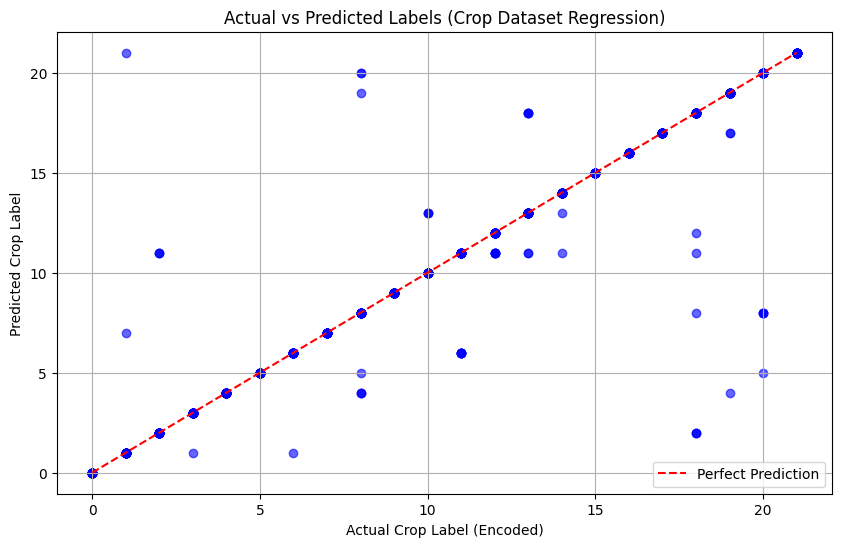

In [ ]:
# 📊 Plot: Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Crop Label (Encoded)')
plt.ylabel('Predicted Crop Label')
plt.title('Actual vs Predicted Labels (Crop Dataset Regression)')
plt.legend()
plt.grid(True)
plt.show()


##**Support Vector Regression**

###**Classification**


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


crop = pd.read_csv("/content/drive/MyDrive/Classroom/CS530 Jan 2025/PROJECT/Crop_recommendation.csv")

le = LabelEncoder()
crop['label_encoded'] = le.fit_transform(crop['label'])

X = crop.drop(['label', 'label_encoded'], axis=1)
y = crop['label_encoded']

# scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [ ]:
#  svm for classification
from sklearn.svm import SVC

# train svm model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# make predictions
y_pred = svm_model.predict(X_test)
y_pred

array([15, 21, 17, 17,  0, 12,  0, 13, 14, 10,  2,  4, 19,  8,  4, 19,  0,
       11, 17, 15,  5, 17, 16, 17,  3,  8, 14, 16, 18, 20, 19, 10,  8, 10,
        8,  2,  8,  3,  3,  9, 17, 12,  2, 11, 14, 11, 18,  4, 15, 11,  2,
        5,  7, 14,  5,  9,  6,  0,  1, 10, 21,  4, 10, 16, 17, 18, 16, 20,
       15, 18, 15,  4,  8,  1,  2, 17,  1,  6, 21, 16,  5,  3,  8, 13, 16,
       12,  5, 13,  2, 19, 11, 13,  6, 17, 18, 13,  9,  5,  2, 10,  4,  8,
       16, 15, 21,  9, 21,  1, 18, 13,  1,  8,  6, 19, 18,  3, 11,  4, 19,
       20, 18,  7,  2,  4,  3,  2,  4, 11,  1, 13,  1,  9, 19,  3,  4, 16,
       18,  1,  1,  0,  9, 15, 14, 13,  4,  6,  0,  4,  9, 13, 14, 10, 21,
       14, 18, 18, 18,  9, 11,  8,  3,  0, 16,  6, 20,  4,  7, 10, 21,  7,
        7,  2, 19,  3,  4, 11, 10,  7, 21,  8,  5,  5,  9,  8, 13,  9,  1,
        9,  4, 17, 17, 14, 12, 19, 21,  9, 11,  0,  2,  3,  7,  7,  1,  6,
       20, 19, 14,  1,  8, 14, 11,  3,  3,  3,  0, 20,  9, 17,  5,  2,  9,
       12, 12,  4, 17,  0

Accuracy Score: 0.9712121212121212

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        26
           2       0.93      0.96      0.94        26
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        30
           6       0.97      1.00      0.98        28
           7       1.00      1.00      1.00        23
           8       0.79      1.00      0.88        34
           9       0.95      1.00      0.97        36
          10       0.85      1.00      0.92        22
          11       1.00      0.96      0.98        26
          12       1.00      1.00      1.00        32
          13       1.00      0.91      0.95        34
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        24
          16       1.

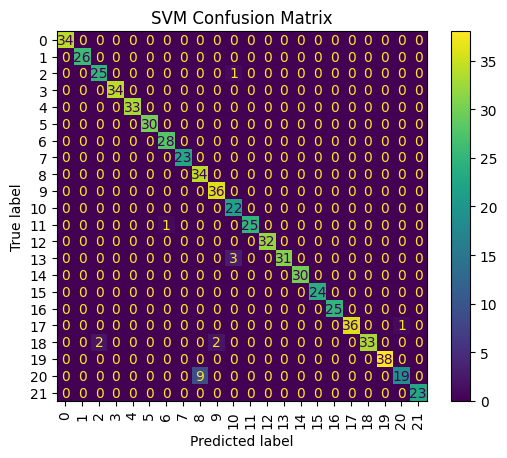

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis', xticks_rotation=90)
plt.title("SVM Confusion Matrix")
plt.show()


####best parameters and accuracy

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Tuned Model Accuracy: 0.9803030303030303

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        26
           2       0.96      0.96      0.96        26
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        33
           5       1.00      0.97      0.98        30
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        23
           8       0.81      1.00      0.89        34
           9       0.95      1.00      0.97        36
          10       0.92      1.00      0.96        22
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        32
          13       1.00      0.97      0.99        34
          14       1.00      1.00      1.00        30
       

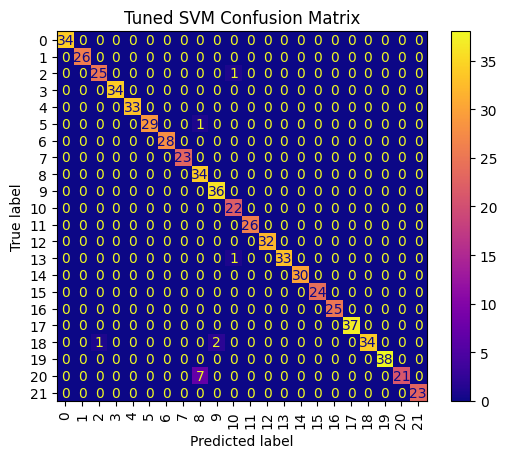

In [ ]:
#model selection
from sklearn.model_selection import GridSearchCV

# set parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

#gridsearchcv
grid_svc = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_svc.fit(X_train, y_train)

# best parameters and accuracy
print("Best Parameters:", grid_svc.best_params_)

# predict with best model
best_svm = grid_svc.best_estimator_
y_pred_best = best_svm.predict(X_test)

# evaluate
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

# plot confusion matrix for best model
cm_best = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best)
disp.plot(cmap='plasma', xticks_rotation=90)
plt.title("Tuned SVM Confusion Matrix")
plt.show()


###**Regression**


In [ ]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder


crop = pd.read_csv("/content/drive/MyDrive/Classroom/CS530 Jan 2025/PROJECT/Crop_recommendation.csv")

# Encode labels
le = LabelEncoder()
crop['label_encoded'] = le.fit_transform(crop['label'])

X = crop.drop(['label', 'label_encoded'], axis=1)
y = crop['label_encoded']


In [ ]:
from sklearn.model_selection import train_test_split

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [ ]:
from sklearn.preprocessing import StandardScaler

# scale features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# scale target
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()


In [ ]:
from sklearn.svm import SVR

# create SVR model
svr = SVR(kernel='rbf')  # You can also try 'linear', 'poly'

# train model
svr.fit(X_train_scaled, y_train_scaled)


SVR()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# predict and inverse transform y
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# calculate scores
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.8630003465389605
MSE: 5.539710879471418


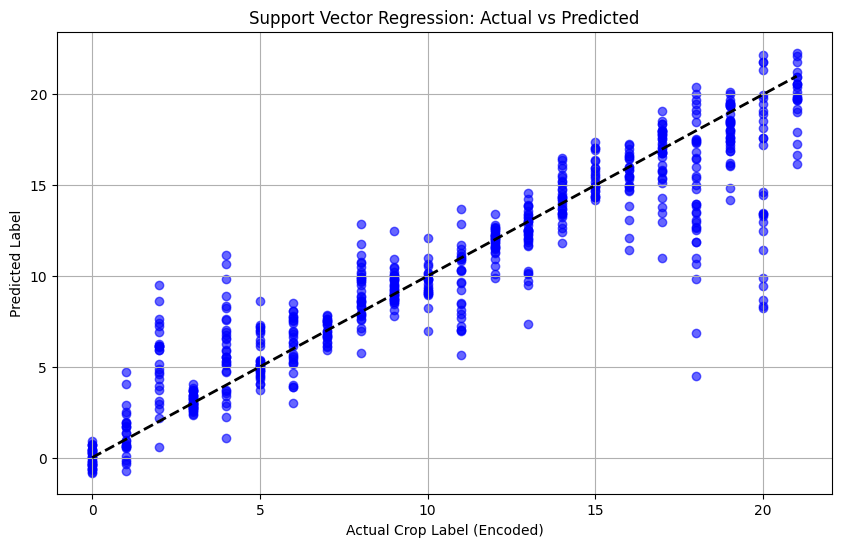

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Crop Label (Encoded)")
plt.ylabel("Predicted Label")
plt.title("Support Vector Regression: Actual vs Predicted")
plt.grid(True)
plt.show()


####best parameters

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# define parameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.2, 0.5]
}

svr = SVR()

# apply GridSearchCV
grid_cv = GridSearchCV(svr, param_grid, cv=5, scoring='r2', verbose=1)
grid_cv.fit(X_train_scaled, y_train_scaled)

#best parameters
print("Best Parameters from GridSearchCV:")
print(grid_cv.best_params_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters from GridSearchCV:
{'C': 10, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# predict using best model
best_model = grid_cv.best_estimator_

y_pred_scaled = best_model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# evaluate
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.89880743783348
MSE: 4.091817193646243


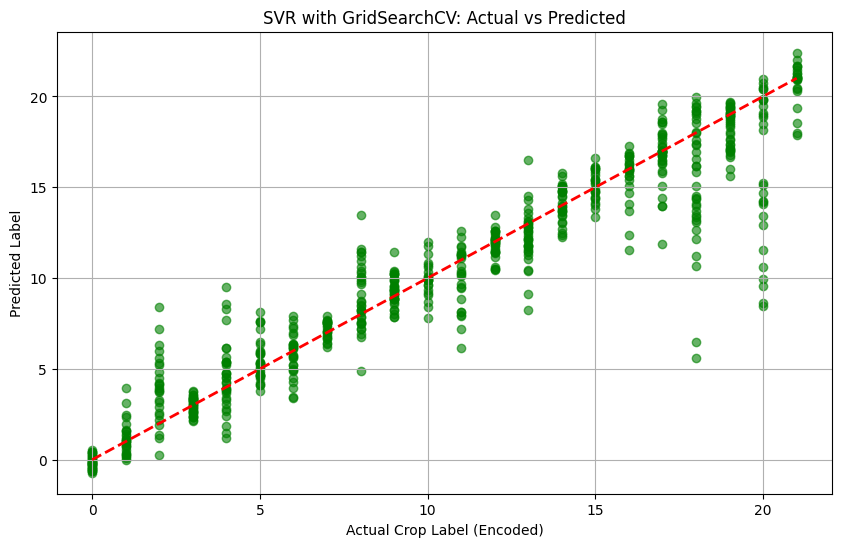

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Crop Label (Encoded)")
plt.ylabel("Predicted Label")
plt.title("SVR with GridSearchCV: Actual vs Predicted")
plt.grid(True)
plt.show()


#**TestFile**

In [ ]:
import pandas as pd
import numpy as np

# define ranges
ranges = {
    'N': (0, 140),
    'P': (5, 145),
    'K': (5, 205),
    'temperature': (8.825675, 43.675493),
    'humidity': (14.258040, 99.981876),
    'ph': (3.504752, 9.935091),
    'rainfall': (20.211267, 298.560117)
}

data = []

for _ in range(50):
    row = {}
    for column in ranges:
        # randomly decide
        if np.random.rand() < 0.9: # 90% chance of having a value
            row[column] = np.random.uniform(ranges[column][0], ranges[column][1])
        else:
            row[column] = None # 10% chance of a missing value
    data.append(row)

df = pd.DataFrame(data)

df.to_csv('test50.csv', index=False)


#**Comparision**

##**Classification**

KNN Accuracy: 0.9712121212121212


<Figure size 1200x800 with 0 Axes>

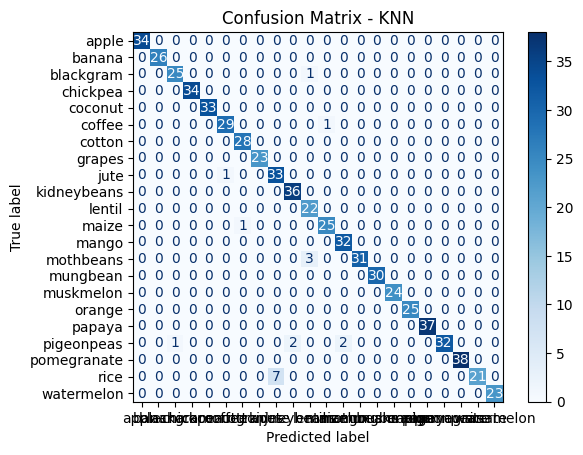

Decision Tree Accuracy: 0.9181818181818182


<Figure size 1200x800 with 0 Axes>

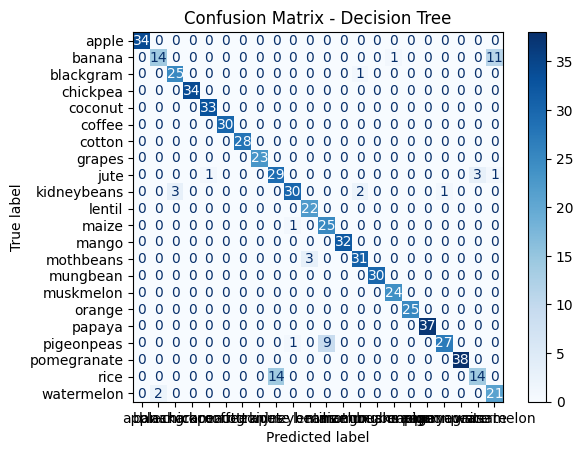

SVM Accuracy: 0.9833333333333333


<Figure size 1200x800 with 0 Axes>

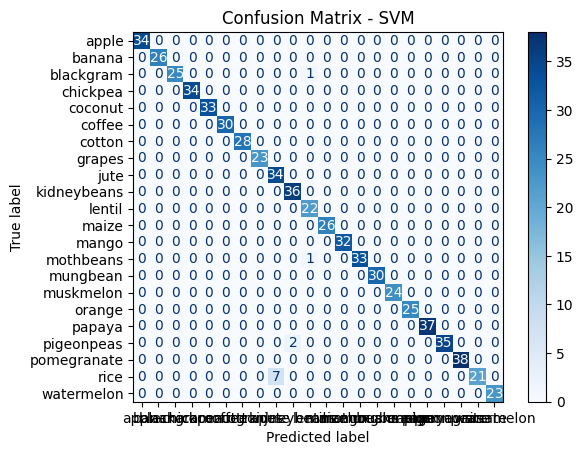

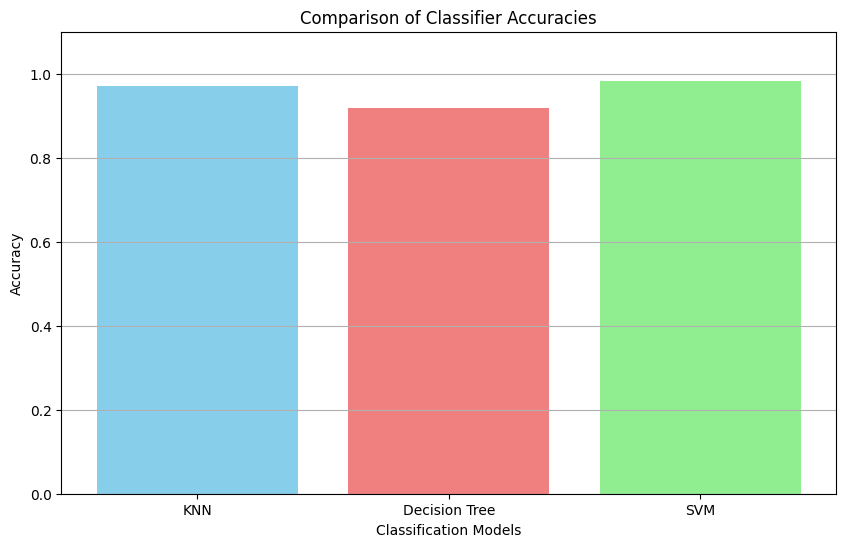

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV


crop = pd.read_csv("/content/drive/MyDrive/Classroom/CS530 Jan 2025/PROJECT/Crop_recommendation.csv")

le = LabelEncoder()
crop['label_encoded'] = le.fit_transform(crop['label'])
X = crop.drop(['label', 'label_encoded'], axis=1)
y = crop['label_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


def evaluate_classifier(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")
    cm = confusion_matrix(y_test, y_pred)

    #confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    plt.figure(figsize=(12,8))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()
    return accuracy, cm

# Using best parameters
# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

#Decision Tree
tree_model = DecisionTreeClassifier(criterion='log_loss',  max_depth=8,max_features='sqrt')
tree_model.fit(X_train, y_train)

# SVM
svm_model = SVC(C=10, gamma='scale', kernel='rbf' ,probability=True)
svm_model.fit(X_train_scaled, y_train)



#Comparison Graph
knn_accuracy, knn_cm = evaluate_classifier(knn, "KNN", X_test_scaled, y_test)
tree_accuracy, tree_cm = evaluate_classifier(tree_model, "Decision Tree", X_test, y_test)
svm_accuracy, svm_cm = evaluate_classifier(svm_model, "SVM", X_test_scaled, y_test)


model_names = ['KNN', 'Decision Tree', 'SVM']
accuracies = [knn_accuracy, tree_accuracy, svm_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Classification Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Classifier Accuracies")
plt.ylim(0, 1.1)
plt.grid(axis='y')
plt.show()



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

crop = pd.read_csv("/content/drive/MyDrive/Classroom/CS530 Jan 2025/PROJECT/Crop_recommendation.csv")

# handle missing values
numerical_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for col in numerical_cols:
    crop[col] = crop[col].fillna(crop[col].mean())

# scale features
scaler = StandardScaler()
X = crop[numerical_cols]
scaler.fit(X)

# encode labels
le = LabelEncoder()
crop['label'] = le.fit_transform(crop['label'])

# sample input
sample = pd.DataFrame({
    'N': [135.2249961],
    'P': [21.90390832],
    'K': [108.2181692],
    'temperature': [22.25559143],
    'humidity': [66.38507634],
    'ph': [np.nan],
    'rainfall': [264.6474491]
})

# fill missing in sample
for col in numerical_cols:
    if sample[col].isnull().any():
        sample[col] = sample[col].fillna(crop[col].mean())

# scale sample
sample_scaled = scaler.transform(sample)

# prediction function
def predict_with_confidence(model, name, X_input, encoder):
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X_input)[0]
        idx = np.argmax(proba)
        label = encoder.inverse_transform([idx])[0]
        conf = proba[idx]
    else:
        idx = model.predict(X_input)[0]
        label = encoder.inverse_transform([idx])[0]
        conf = "n/a"

    print(f"{name} prediction: {label}")
    print(f"{name} confidence: {conf}")
    print("-" * 40)

# predictions (models must be defined)
predict_with_confidence(knn, "knn", sample_scaled, le)
predict_with_confidence(tree_model, "decision tree", sample, le)
predict_with_confidence(svm_model, "svm", sample_scaled, le)


knn prediction: rice
knn confidence: 1.0
----------------------------------------
decision tree prediction: pomegranate
decision tree confidence: 1.0
----------------------------------------
svm prediction: rice
svm confidence: 0.47221327572670707
----------------------------------------


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

crop = pd.read_csv("/content/drive/MyDrive/Classroom/CS530 Jan 2025/PROJECT/Crop_recommendation.csv")

# handle missing values
numerical_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for col in numerical_cols:
    crop[col] = crop[col].fillna(crop[col].mean())

# scale features
scaler = StandardScaler()
X = crop[numerical_cols]
scaler.fit(X)

# encode labels
le = LabelEncoder()
crop['label'] = le.fit_transform(crop['label'])

# test data
test_data = pd.read_csv("/content/test50.csv")

# handle missing values in test data
for col in numerical_cols:
    if test_data[col].isnull().any():
        test_data[col] = test_data[col].fillna(crop[col].mean())

# scale test data
test_scaled = scaler.transform(test_data[numerical_cols])

# store predictions and confidence for each model
knn_preds = []
knn_confs = []
tree_preds = []
tree_confs = []
svm_preds = []
svm_confs = []

# prediction function
def predict_with_confidence(model, name, X_input, encoder, pred_list, conf_list):
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X_input)
        for i in range(len(proba)):
            idx = np.argmax(proba[i])
            label = encoder.inverse_transform([idx])[0]
            conf = proba[i][idx]
            pred_list.append(label)
            conf_list.append(conf)
    else:
        pred = model.predict(X_input)
        for i in range(len(pred)):
            label = encoder.inverse_transform([pred[i]])[0]
            pred_list.append(label)
            conf_list.append('n/a')


predict_with_confidence(knn, "knn", test_scaled, le, knn_preds, knn_confs)
predict_with_confidence(tree_model, "decision tree", test_data[numerical_cols], le, tree_preds, tree_confs)
predict_with_confidence(svm_model, "svm", test_scaled, le, svm_preds, svm_confs)

# add prediction and confidence to the original test data
test_data['knn_pred'] = knn_preds
test_data['knn_conf'] = knn_confs
test_data['tree_pred'] = tree_preds
test_data['tree_conf'] = tree_confs
test_data['svm_pred'] = svm_preds
test_data['svm_conf'] = svm_confs

# save predictions to CSV
test_data.to_csv("test50_pred.csv", index=False)

print("test50_pred.csv")


test50_pred.csv


##**Regression**

KNN Regression - MSE: 2.6554, R-squared: 0.9343
Decision Tree Regression - MSE: 5.0364, R-squared: 0.8754
SVR Regression - MSE: 7.9233, R-squared: 0.8041


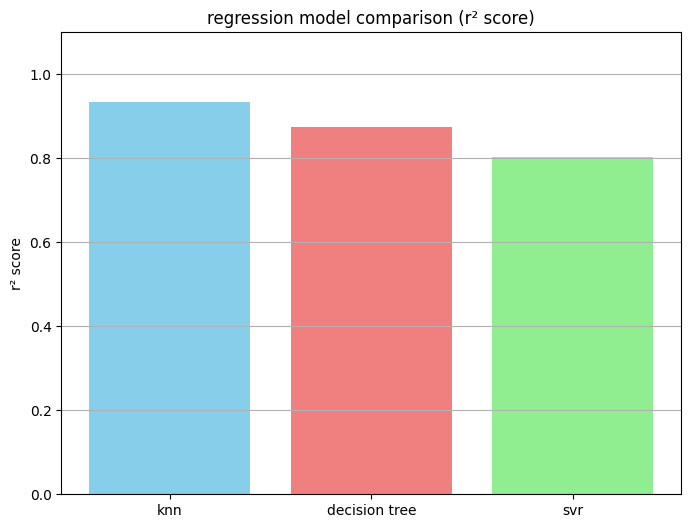

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# train-test data assumed to be already split: X_train, X_test, y_train, y_test

# knn regressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)
print(f"KNN Regression - MSE: {knn_mse:.4f}, R-squared: {knn_r2:.4f}")

# decision tree regressor
tree = DecisionTreeRegressor(criterion='absolute_error', max_depth=12, max_features='log2')
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
dt_mse = mean_squared_error(y_test, tree_pred)
dt_r2 = r2_score(y_test, tree_pred)
print(f"Decision Tree Regression - MSE: {dt_mse:.4f}, R-squared: {dt_r2:.4f}")

# svr regressor
svr = SVR(kernel='rbf', C=10, epsilon=0.1)
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)
print(f"SVR Regression - MSE: {svr_mse:.4f}, R-squared: {svr_r2:.4f}")

# compare r² scores
models = ['knn', 'decision tree', 'svr']
scores = [knn_r2, dt_r2, svr_r2]

plt.figure(figsize=(8, 6))
plt.bar(models, scores, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title("regression model comparison (r² score)")
plt.ylabel("r² score")
plt.ylim(0, 1.1)
plt.grid(axis='y')
plt.show()



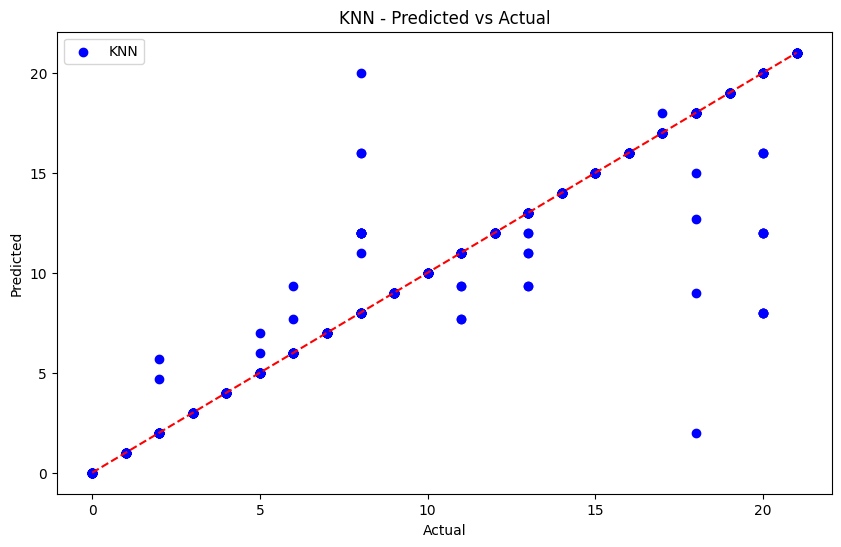

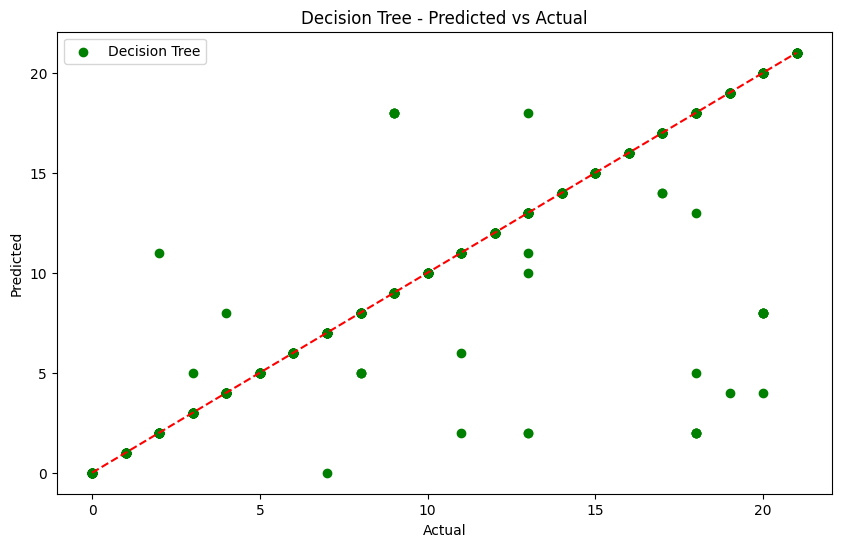

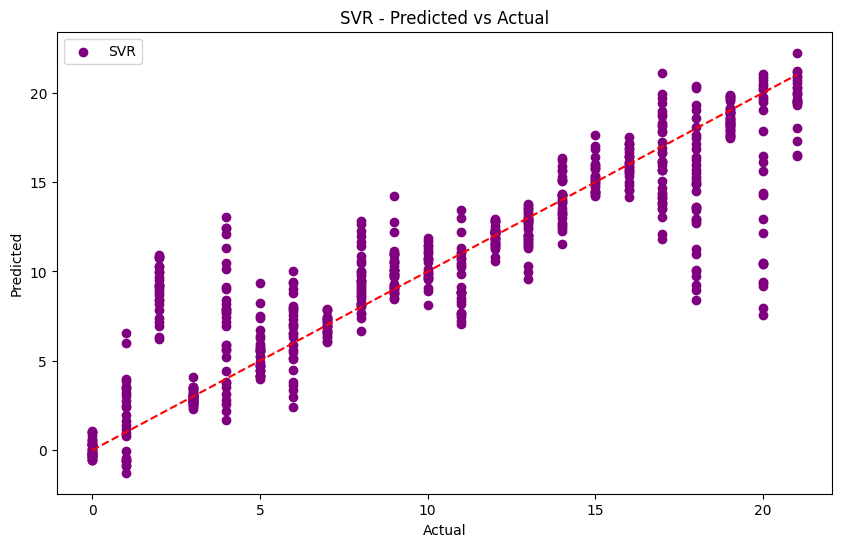

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_test, y_pred_knn, y_pred_dt, and y_pred_svr are defined from your regression models

# Plot KNN
plt.figure(figsize=(10,6))
plt.scatter(y_test, knn_pred, color='blue', label='KNN') # Changed to knn_pred
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('KNN - Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Plot Decision Tree
plt.figure(figsize=(10,6))
plt.scatter(y_test, tree_pred, color='green', label='Decision Tree') # Changed to tree_pred
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Decision Tree - Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Plot SVR
plt.figure(figsize=(10,6))
plt.scatter(y_test, svr_pred, color='purple', label='SVR') # Changed to svr_pred
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('SVR - Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# 🌾 Model Comparison on Crop Recommendation Dataset

We evaluated three models each for **classification** and **regression** using the Crop Recommendation Dataset.

---
## 🔍 Observations:
### 🔹 Classification (Multi-Class)

**Models Used:**
- **KNN Classifier** (`k=3`)
- **Decision Tree** (`log_loss`, `max_depth=8`, `max_features='sqrt'`)
- **SVM Classifier** (`C=10`, `kernel='rbf'`, `gamma='scale'`)

**Accuracy Results:**

| Model         | Accuracy |
|---------------|----------|
| SVM           | **98.33%** ✅  
| KNN           | 97.12%  
| Decision Tree | 91.82%  

✔️ **Best**: SVM performed best in terms of accuracy and generalization.

---

### 🔹 Regression

**Models Used:**
- **KNN Regressor** (`k=3`)
- **Decision Tree Regressor** (`absolute_error`, `max_depth=12`, `max_features='log2'`)
- **SVR** (`C=10`, `epsilon=0.1`, `kernel='rbf'`)

**Evaluation Metrics:**

| Model         | MSE     | R² Score |
|---------------|---------|----------|
| KNN           | **2.6554** ✅ | **0.9343** ✅  
| Decision Tree | 5.3182  | 0.8685  
| SVR           | 7.9233  | 0.8041  

✔️ **Best**: KNN gave the lowest error and highest R², making it ideal for this regression task.

---

## ✅ Conclusion :

- For **classification**, **SVM** is the most accurate.
- For **regression**, **KNN** shows the best predictive performance.

These results highlight the importance of model selection based on the task type.


#**Dimensionality reduction and visualization**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.manifold import TSNE


In [ ]:
# Load dataset
crop = pd.read_csv("/content/drive/MyDrive/Classroom/CS530 Jan 2025/PROJECT/Crop_recommendation.csv")

# Encode labels
le = LabelEncoder()
crop['label_encoded'] = le.fit_transform(crop['label'])

# Separate features and labels
X = crop.drop(['label', 'label_encoded'], axis=1)
y = crop['label_encoded']


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


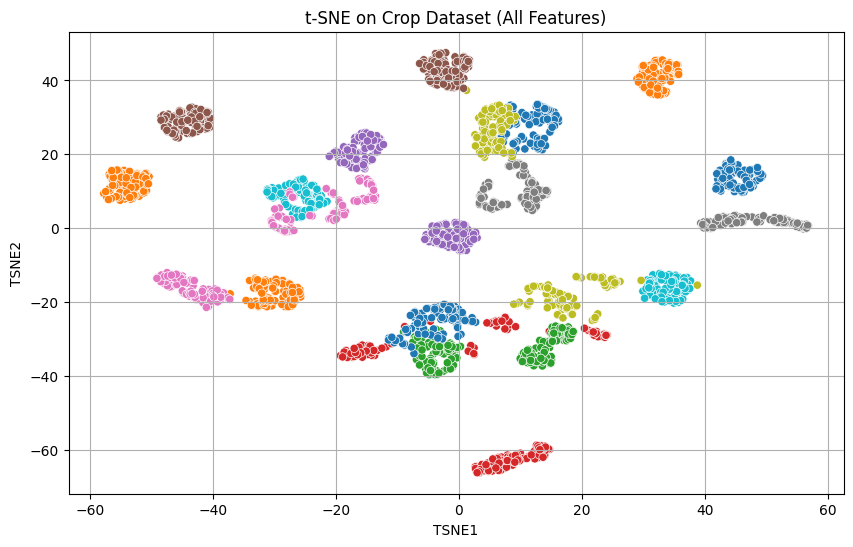

In [ ]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Create DataFrame for visualization
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['label'] = y

# Plot t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='label', palette='tab10', data=tsne_df, legend=False)
plt.title('t-SNE on Crop Dataset (All Features)')
plt.grid(True)
plt.show()


#Extra

####**R^2 Score**


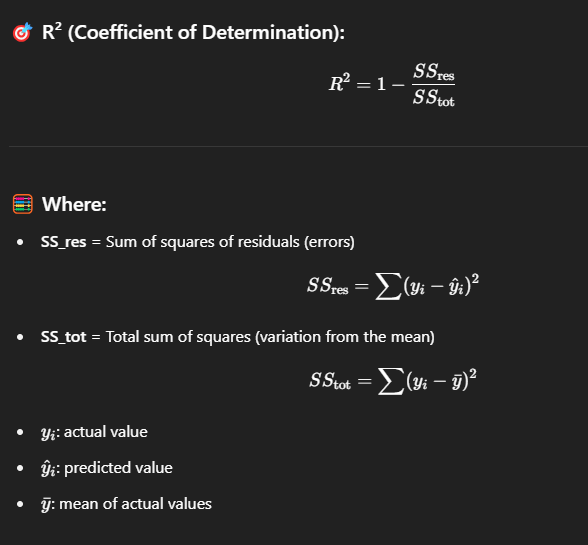

In [ ]:
from sklearn.metrics import r2_score

y_true = [3, 5, 7, 9]
y_pred = [2.8, 5.1, 7.3, 9.2]

r2 = r2_score(y_true, y_pred)
print("R² score:", r2)


R² score: 0.991
